# A.Table of content:

- [B. Instructions:](#B.-Instructions:)  
- [C. Import, functions & data load:](#C.-Import,-functions-&-data-load:)  
- [1. Part 1 - Exploratory Data Analysis (EDA):](#1.-Part-1---Exploratory-Data-Analysis-(EDA):)
    - [1.1. Data wrangling:](#1.1.-Data-wrangling:)  
    - [1.2. Exploratory data analysis - EDA:](#1.2.-Exploratory-data-analysis---EDA:)  
    - [1.3. Reporting:](#1.3.-Reporting:)
- [2. Part 2 - Experiment and metrics design:](#2.-Part-2---Experiment-and-metrics-design:)
    - [2.1. Key measure of success:](#2.1.-Key-measure-of-success:)  
    - [2.2. Practical experiment:](#2.2.-Practical-experiment:)
- [3. Part 3 - Predictive modeling:](#3.-Part-3---Predictive-modeling:)
    - [3.1. Data wrangling:](#3.1.-Data-wrangling:)
    - [3.2. Exploratory data analysis - EDA:](#3.2.-Exploratory-data-analysis---EDA:)
    - [3.3. Data preprocessing:](#3.3.-Data-preprocessing:)
    - [3.4. Modeling:](#3.4.-Modeling:)  
    - [3.5. Recommendations:](#3.5.-Recommendations:)   

# B. Instructions:

In [5]:
from IPython.display import IFrame

In [6]:
instructions_path = r"..\references\ultimate_data_science_challenge.pdf"

In [7]:
IFrame(instructions_path, width=800, height=600)

# C. Import, functions & data load:

**IMPORT:**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
%pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE

Note: you may need to restart the kernel to use updated packages.


**FUNCTIONS:**

In [12]:
def week_of_month(dt):
    return (dt.day - 1) // 7 + 1

In [13]:
def category_plot(df1, df2, features, df1_label="retained", df2_label="non_retained"):
    
    for f in features:
        fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)

        sns.countplot(data=df1, x=f, ax=axes[0])
        axes[0].set_title(f"{df1_label} - {f}")
        axes[0].set_xlabel(f)
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis="x", rotation=45)

        sns.countplot(data=df2, x=f, ax=axes[1])
        axes[1].set_title(f"{df2_label} - {f}")
        axes[1].set_xlabel(f)
        axes[1].set_ylabel("")
        axes[1].tick_params(axis="x", rotation=45)

        fig.tight_layout()
        fig.savefig(f"../docs/{f}_comparison.png", dpi=300, bbox_inches="tight")
        plt.show()

In [14]:
def histogram_plot(df1, df2, features, df1_label="retained", df2_label="non_retained"):
    
    for f in features:
        fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)

        sns.histplot(df1[f], bins=30, ax=axes[0], kde=True)
        axes[0].set_title(f"{df1_label} - {f}")
        axes[0].set_xlabel(f)
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis="x", rotation=45)

        sns.histplot(df2[f], bins=30, ax=axes[1], kde=True)
        axes[1].set_title(f"{df2_label} - {f}")
        axes[1].set_xlabel(f)
        axes[1].set_ylabel("")
        axes[1].tick_params(axis="x", rotation=45)

        fig.tight_layout()
        fig.savefig(f"../docs/{f}_comparison.png", dpi=300, bbox_inches="tight")
        plt.show()

In [15]:
def model_performance_metrics(model, research_method, y_test, y_pred):
    """
    Compute, print and return the F1, Precision, Recall scores
    Display the classification report and the confusion matrix
    """

    # compute metrics:
    f1_score_model = f1_score(y_test, y_pred, average="macro")
    precision_model = precision_score(y_test, y_pred, average="macro")
    recall_model = recall_score(y_test, y_pred, average="macro")
    classification_report_model = classification_report(y_test, y_pred)
    cm_model = confusion_matrix(y_test, y_pred)

    # print metrics:
    print(f"{model}, {research_method}, F1 score: {f1_score_model}.")
    print(f"{model}, {research_method}, Precision score: {precision_model}.")
    print(f"{model}, {research_method}, Recall score: {recall_model}.")
    print(f"\n{model}, {research_method}, Classification Report:\n {classification_report_model}.")
    print()

    #display confusion matrix:
    cm_model_display = ConfusionMatrixDisplay(confusion_matrix=cm_model)
    cm_model_display.plot(cmap="Blues")
    plt.title(f"{model} - {research_method}, Confusion Matrix")
    plt.show()

    # returns metrics for logging or comparison:
    return classification_report_model

**DATA LOAD:**

**Part 1:**

In [18]:
file_path = r"..\data\raw\logins.json"

In [19]:
df = pd.read_json(file_path)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


**Part 3:**

In [21]:
file_path_3 = r"..\data\raw\ultimate_data_challenge.json"

In [22]:
df3 = pd.read_json(file_path_3)

In [23]:
df3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


# 1. Part 1 - Exploratory Data Analysis (EDA):

## 1.1. Data wrangling:

In [26]:
df.shape

(93142, 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [28]:
df.sort_values(by="login_time", inplace=True)

In [29]:
df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [30]:
df = df.set_index("login_time")
login_counts = df.resample("15min").size().reset_index(name="count")
print(login_counts)

              login_time  count
0    1970-01-01 20:00:00      2
1    1970-01-01 20:15:00      6
2    1970-01-01 20:30:00      9
3    1970-01-01 20:45:00      7
4    1970-01-01 21:00:00      1
...                  ...    ...
9783 1970-04-13 17:45:00      5
9784 1970-04-13 18:00:00      5
9785 1970-04-13 18:15:00      2
9786 1970-04-13 18:30:00      7
9787 1970-04-13 18:45:00      6

[9788 rows x 2 columns]


In [31]:
days = login_counts["login_time"].dt.date.unique()
days

array([datetime.date(1970, 1, 1), datetime.date(1970, 1, 2),
       datetime.date(1970, 1, 3), datetime.date(1970, 1, 4),
       datetime.date(1970, 1, 5), datetime.date(1970, 1, 6),
       datetime.date(1970, 1, 7), datetime.date(1970, 1, 8),
       datetime.date(1970, 1, 9), datetime.date(1970, 1, 10),
       datetime.date(1970, 1, 11), datetime.date(1970, 1, 12),
       datetime.date(1970, 1, 13), datetime.date(1970, 1, 14),
       datetime.date(1970, 1, 15), datetime.date(1970, 1, 16),
       datetime.date(1970, 1, 17), datetime.date(1970, 1, 18),
       datetime.date(1970, 1, 19), datetime.date(1970, 1, 20),
       datetime.date(1970, 1, 21), datetime.date(1970, 1, 22),
       datetime.date(1970, 1, 23), datetime.date(1970, 1, 24),
       datetime.date(1970, 1, 25), datetime.date(1970, 1, 26),
       datetime.date(1970, 1, 27), datetime.date(1970, 1, 28),
       datetime.date(1970, 1, 29), datetime.date(1970, 1, 30),
       datetime.date(1970, 1, 31), datetime.date(1970, 2, 1),
  

In [32]:
len(days)

103

In [33]:
login_counts["week_day"] = login_counts["login_time"].dt.day_name()
login_counts["date"] = login_counts["login_time"].dt.date
login_counts["time"] = login_counts["login_time"].dt.time
login_counts["month_name"] = login_counts["login_time"].dt.month_name()
login_counts["week_of_month"] = login_counts["login_time"].apply(week_of_month)
login_counts.drop("login_time", axis=1, inplace=True)
login_counts = login_counts[["month_name", "week_of_month", "week_day", "date", "time", "count"]]
login_counts

,month_name,week_of_month,week_day,date,time,count
0,January,1,Thursday,1970-01-01,20:00:00,2
1,January,1,Thursday,1970-01-01,20:15:00,6
2,January,1,Thursday,1970-01-01,20:30:00,9
3,January,1,Thursday,1970-01-01,20:45:00,7
4,January,1,Thursday,1970-01-01,21:00:00,1
...,...,...,...,...,...,...
9783,April,2,Monday,1970-04-13,17:45:00,5
9784,April,2,Monday,1970-04-13,18:00:00,5
9785,April,2,Monday,1970-04-13,18:15:00,2
9786,April,2,Monday,1970-04-13,18:30:00,7


## 1.2. Exploratory data analysis - EDA:

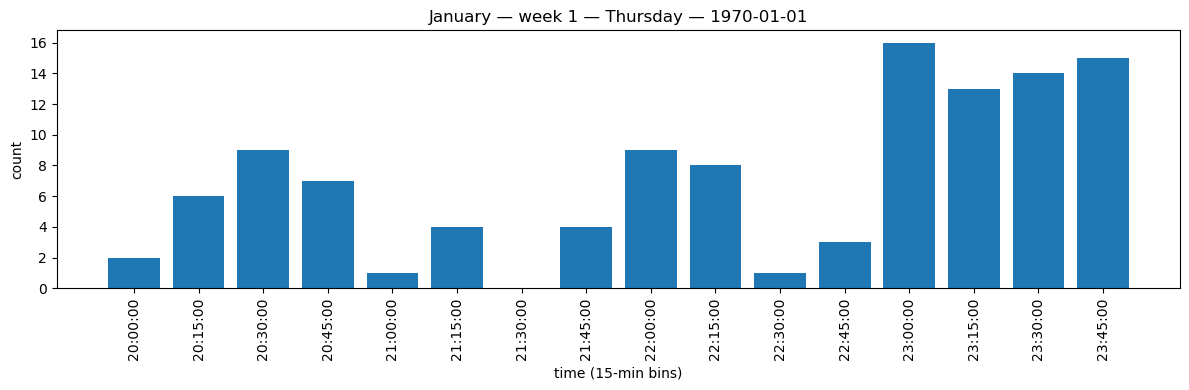

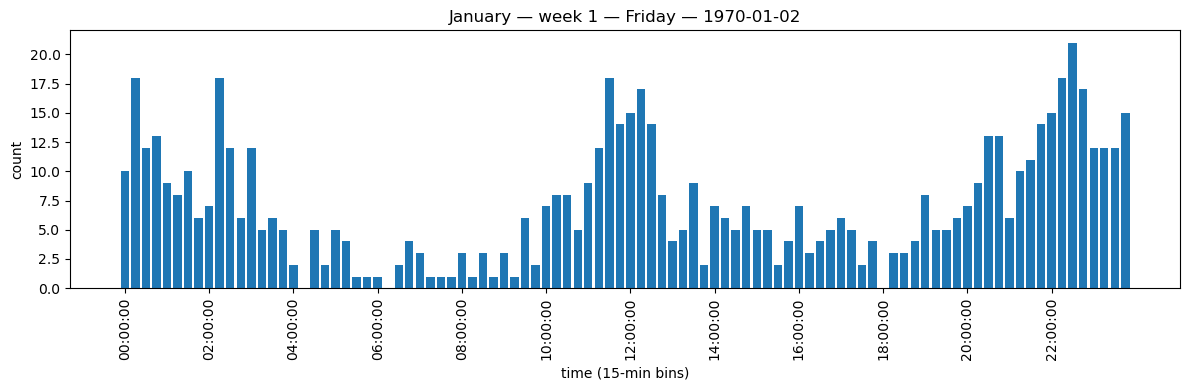

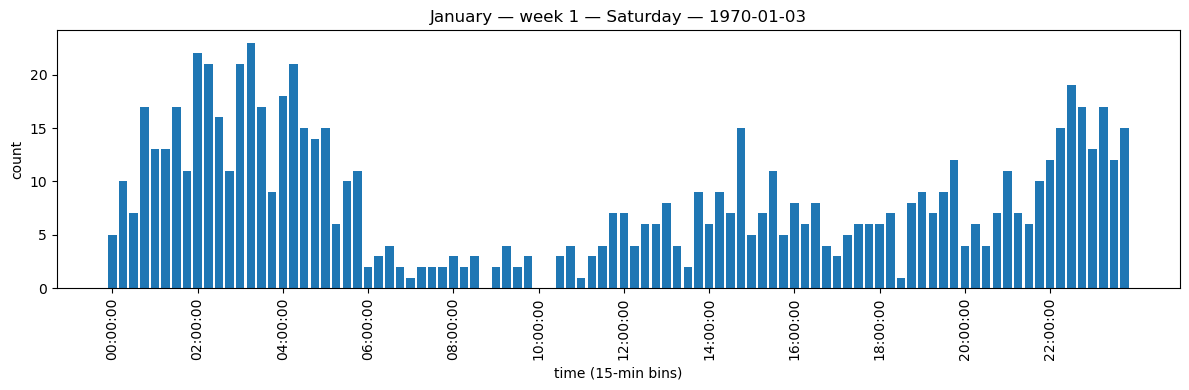

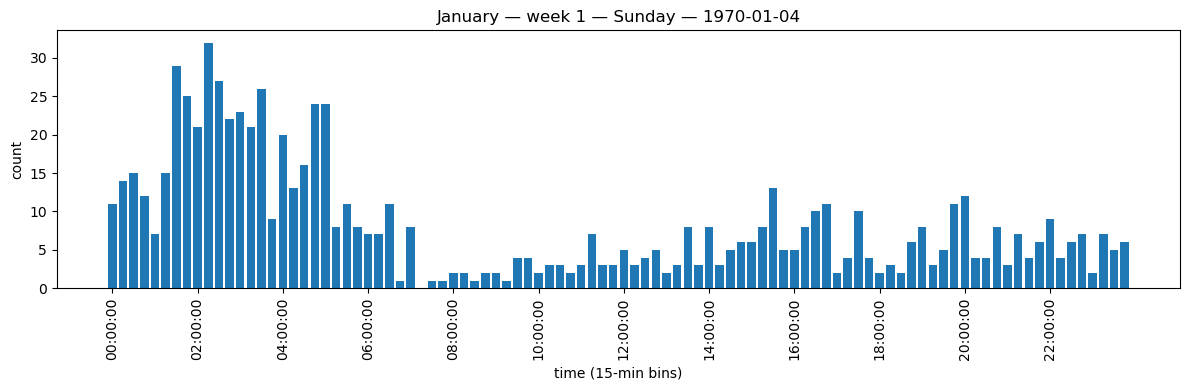

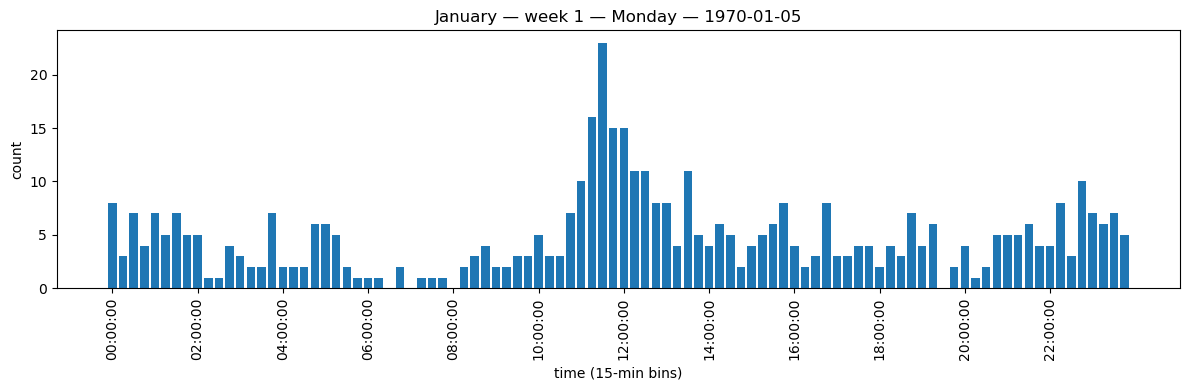

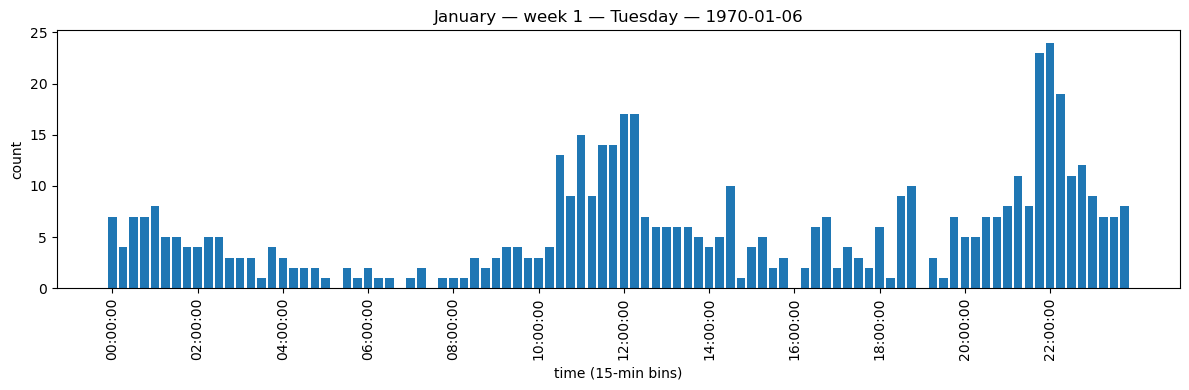

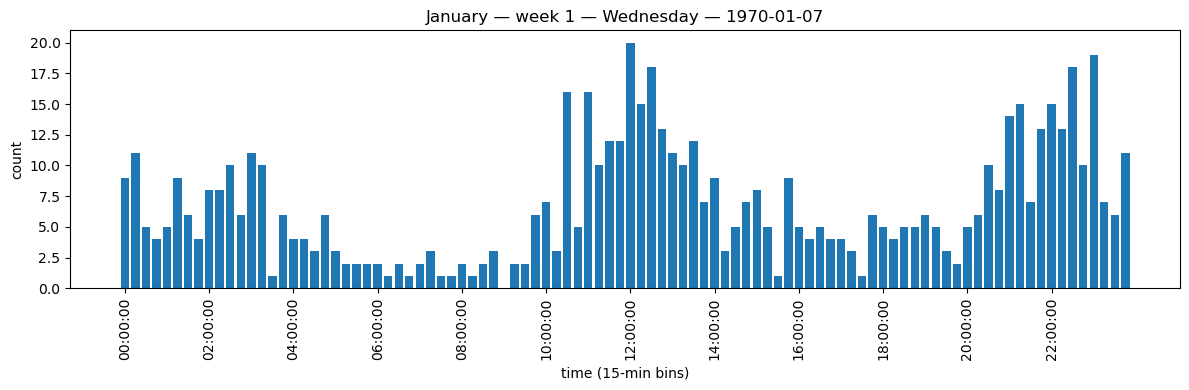

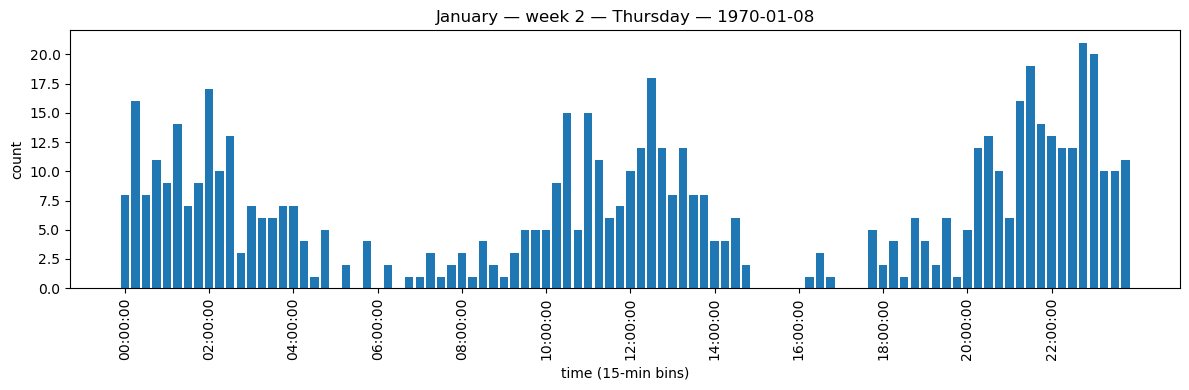

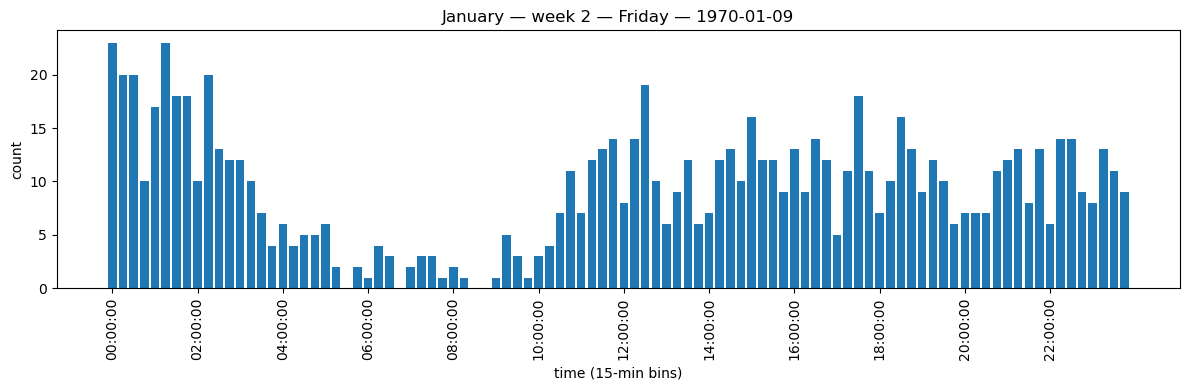

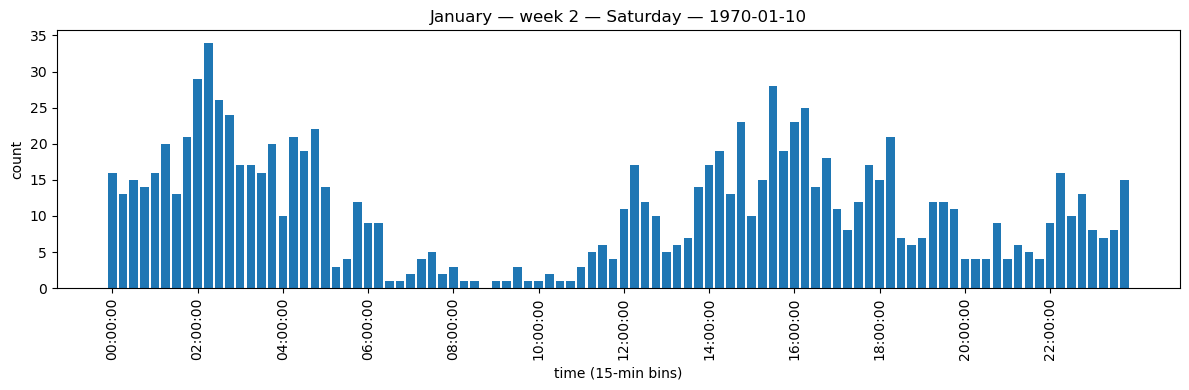

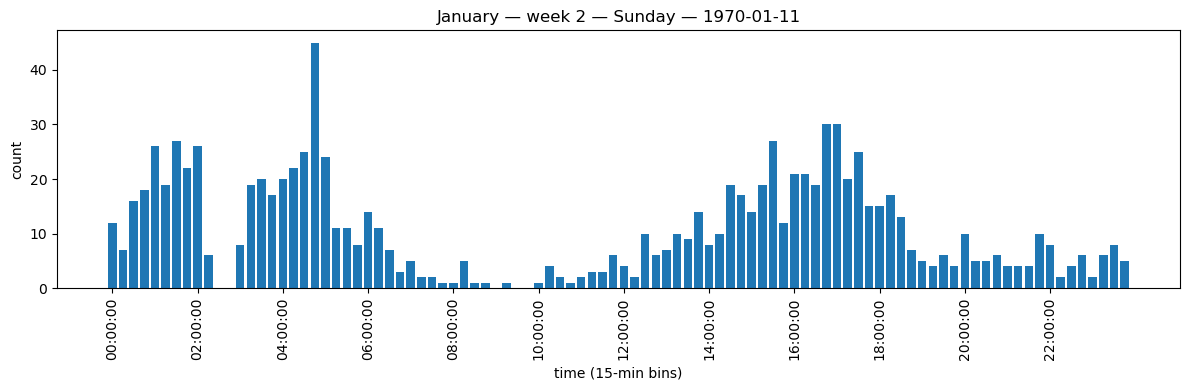

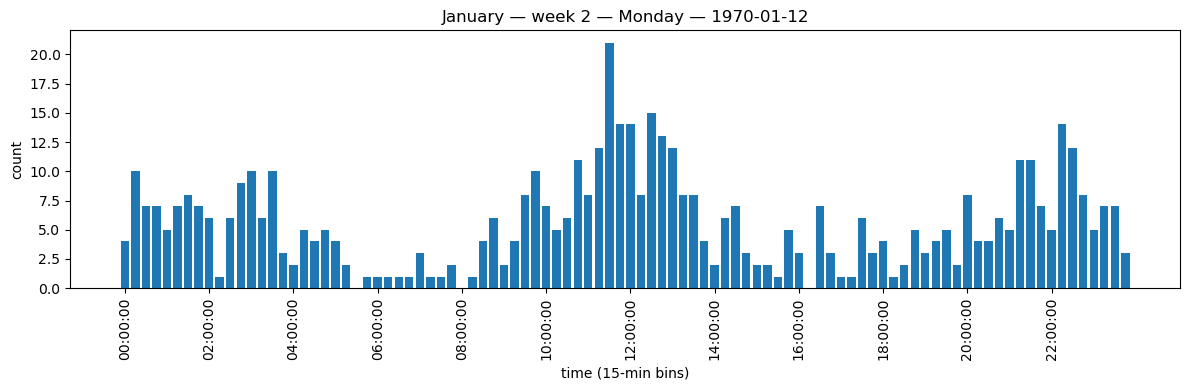

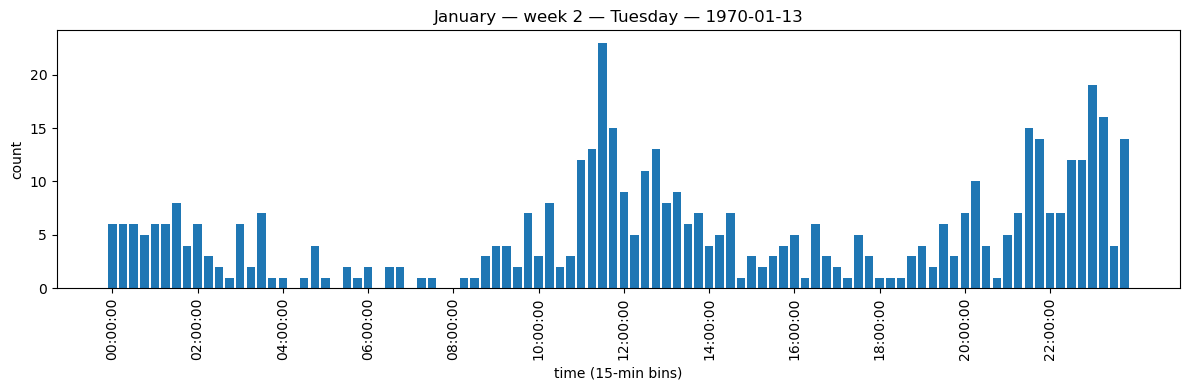

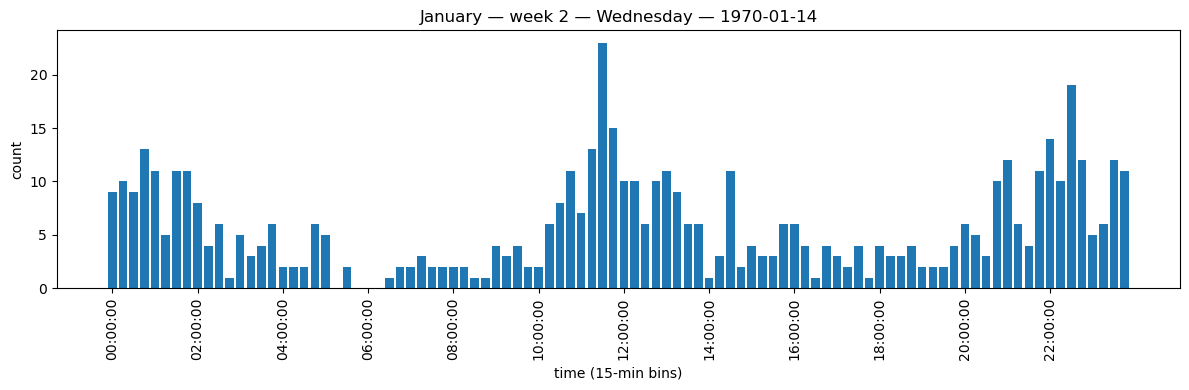

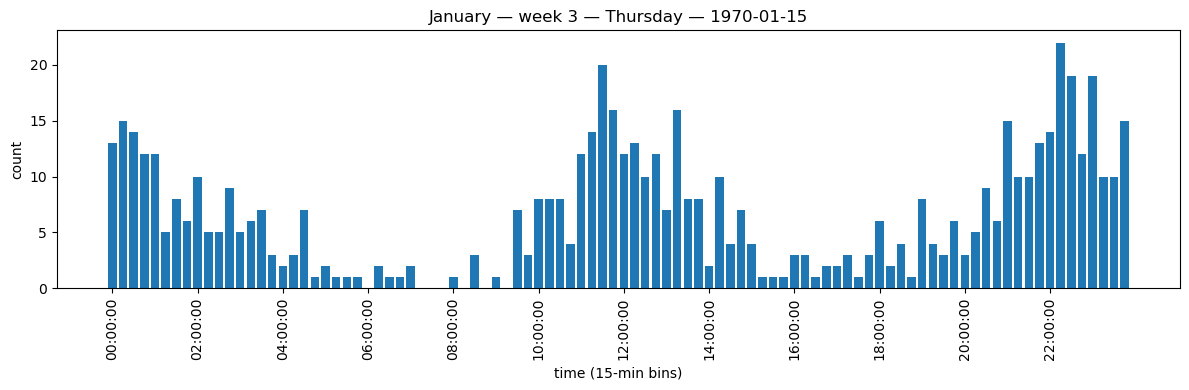

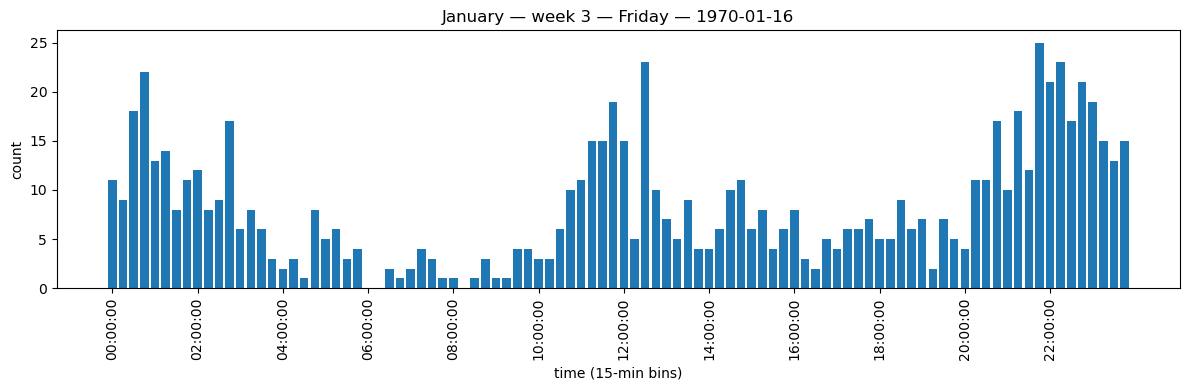

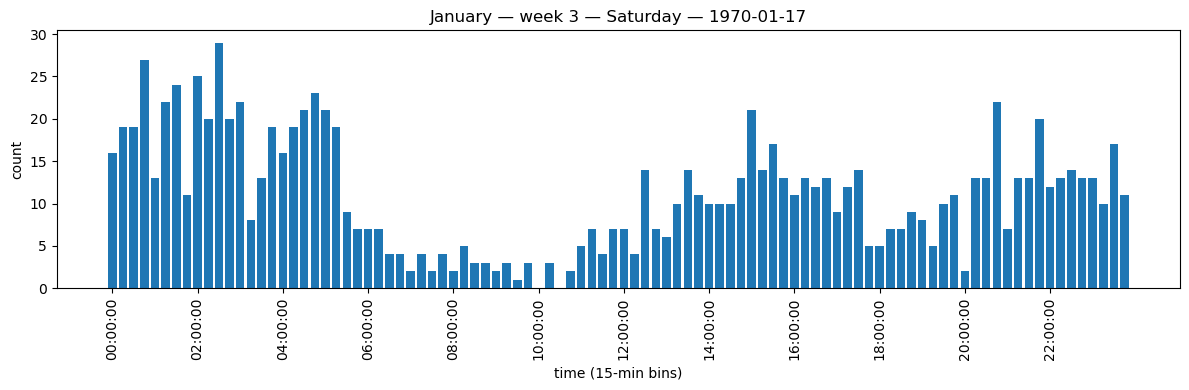

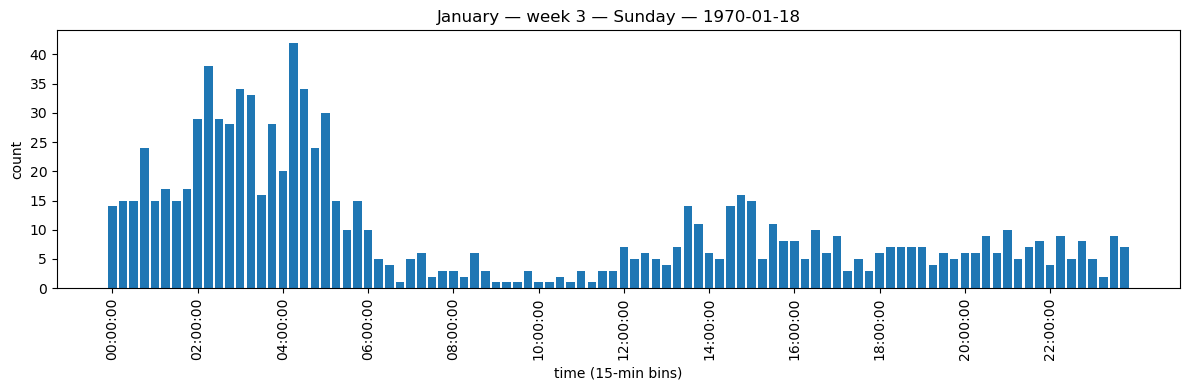

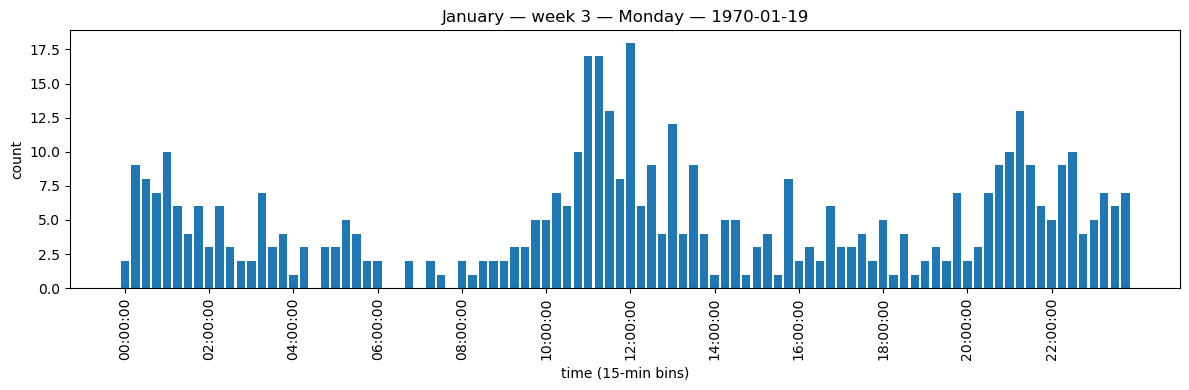

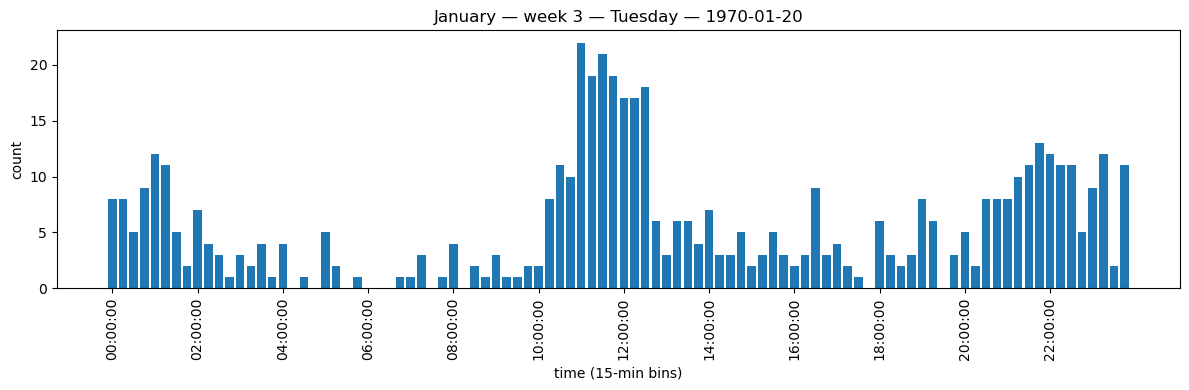

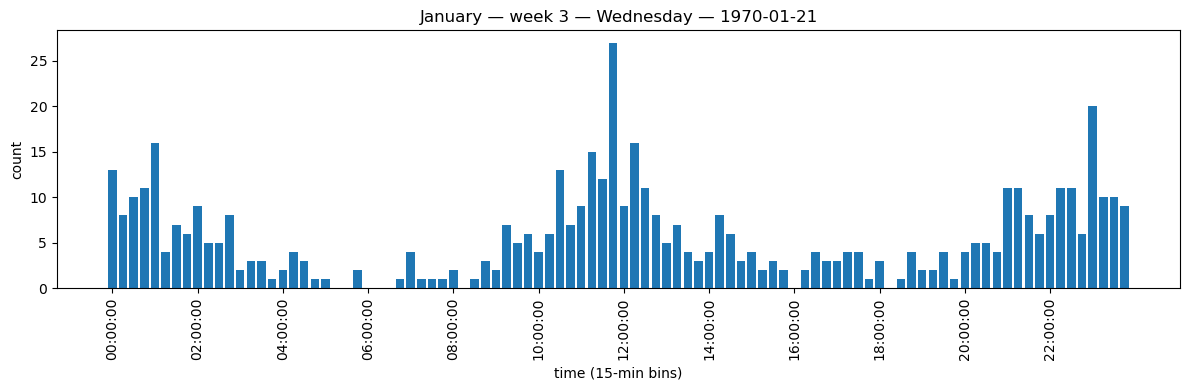

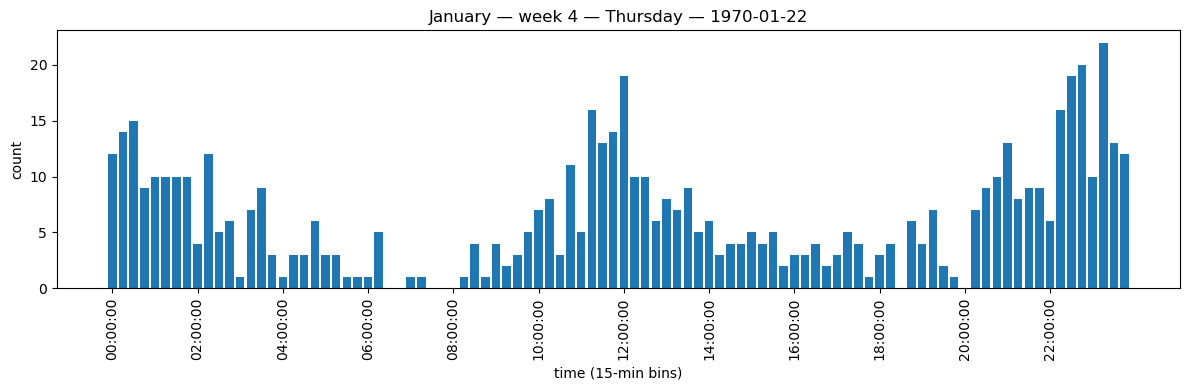

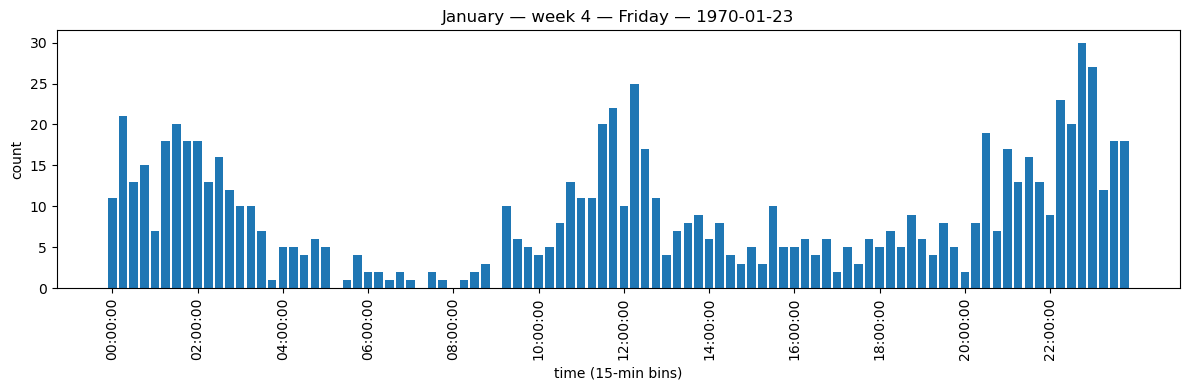

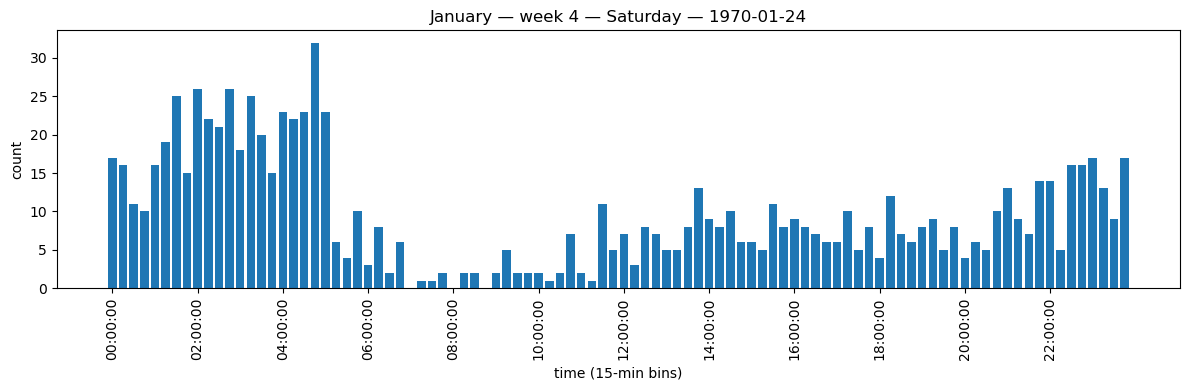

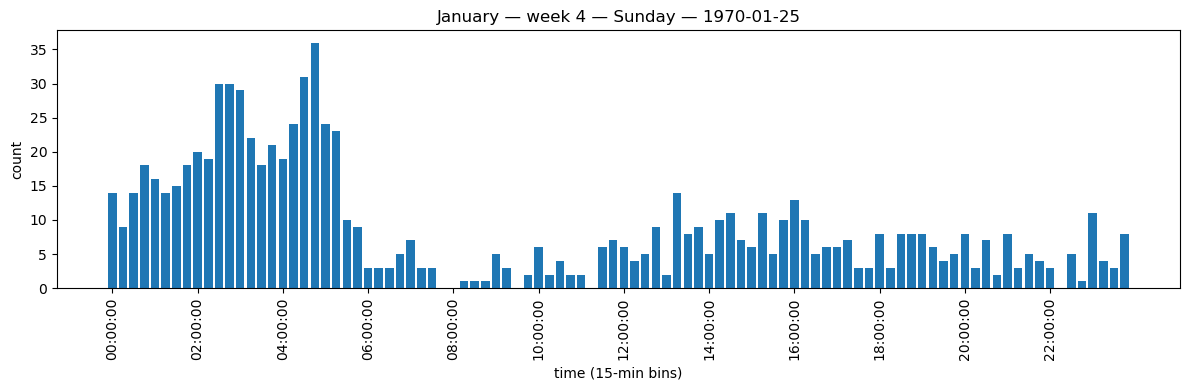

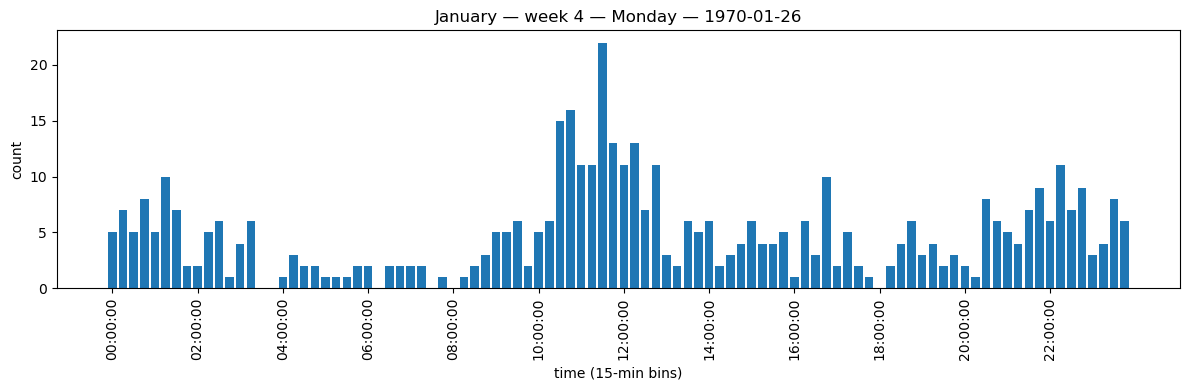

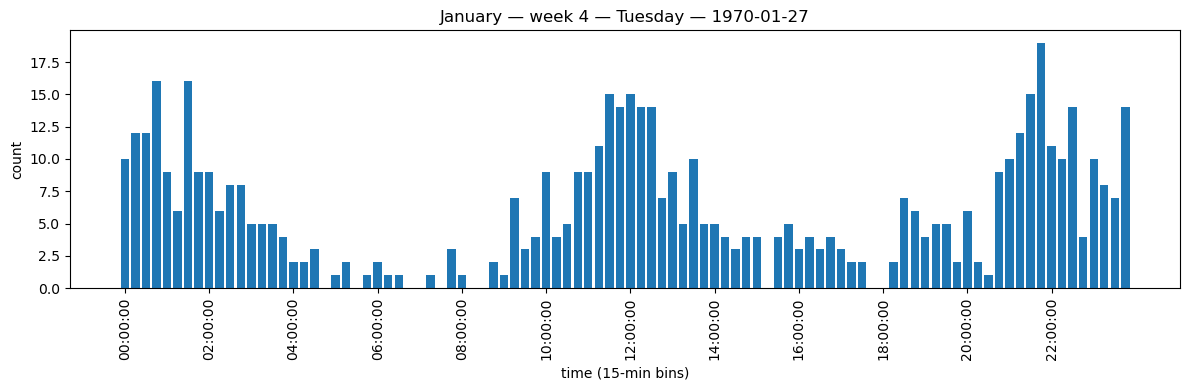

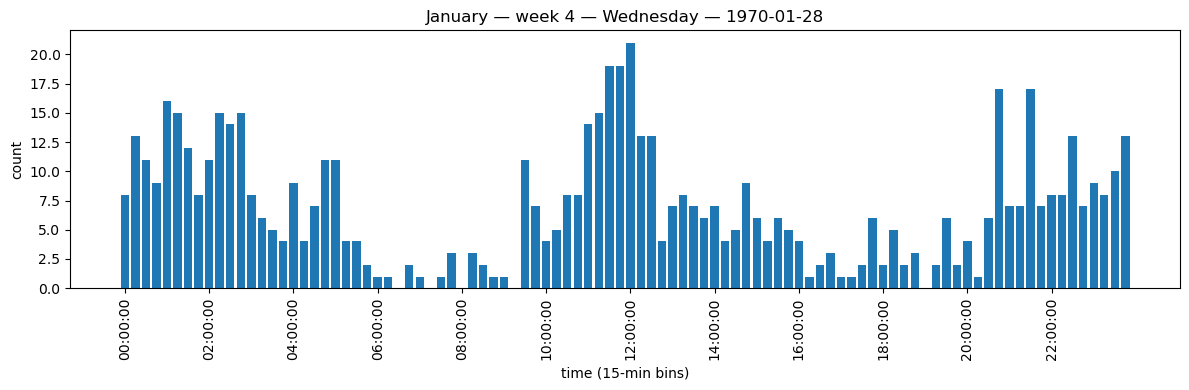

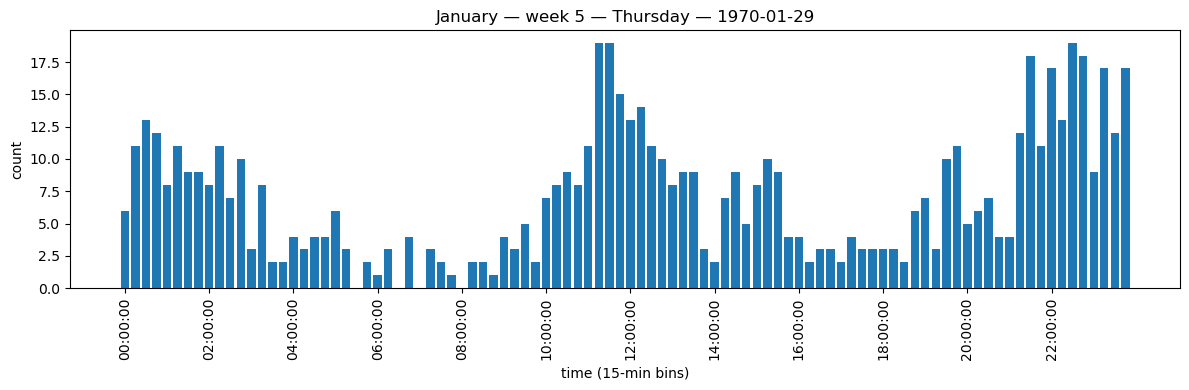

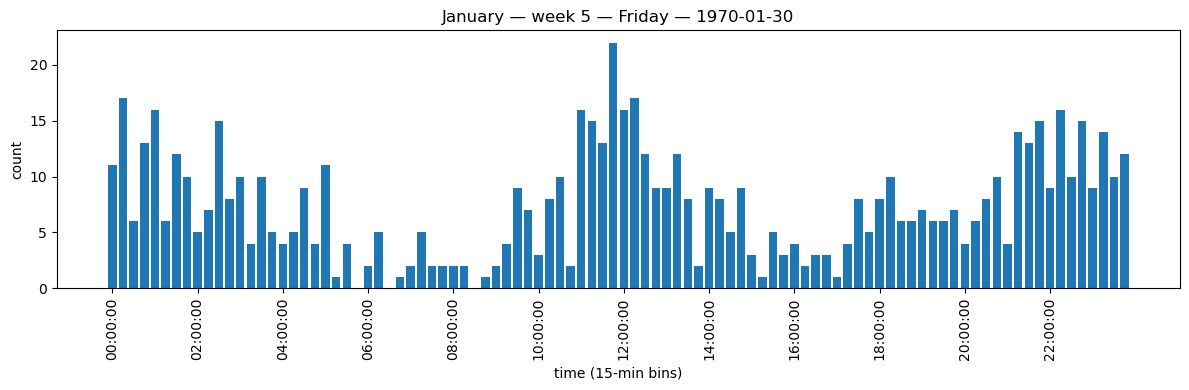

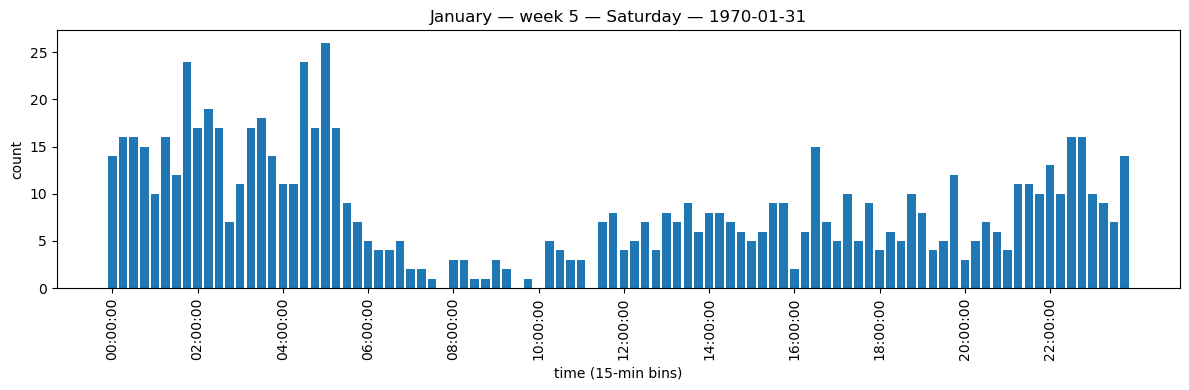

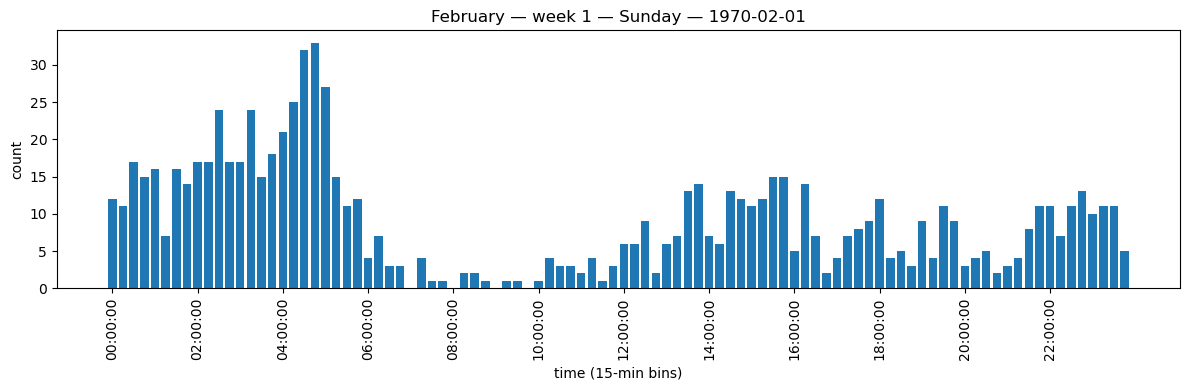

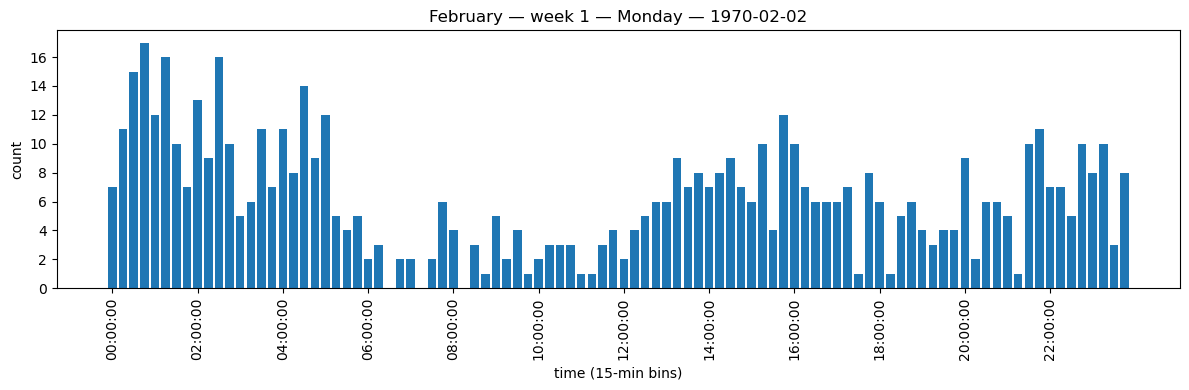

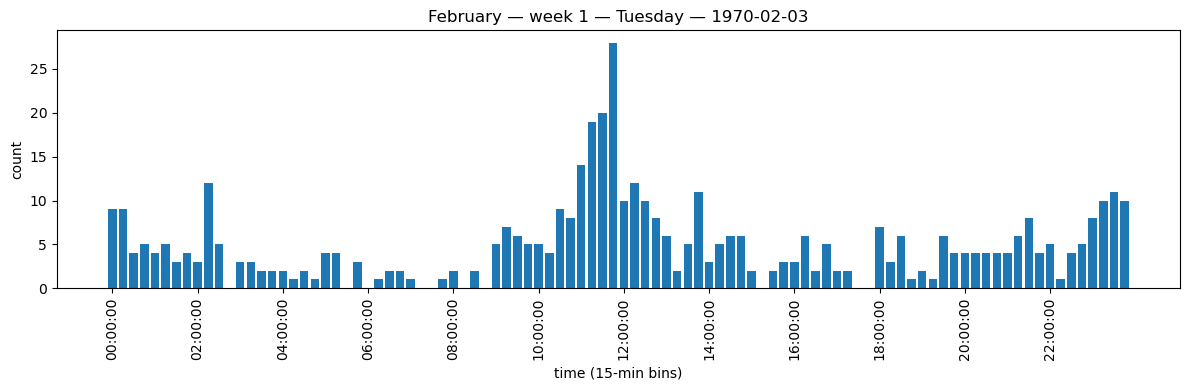

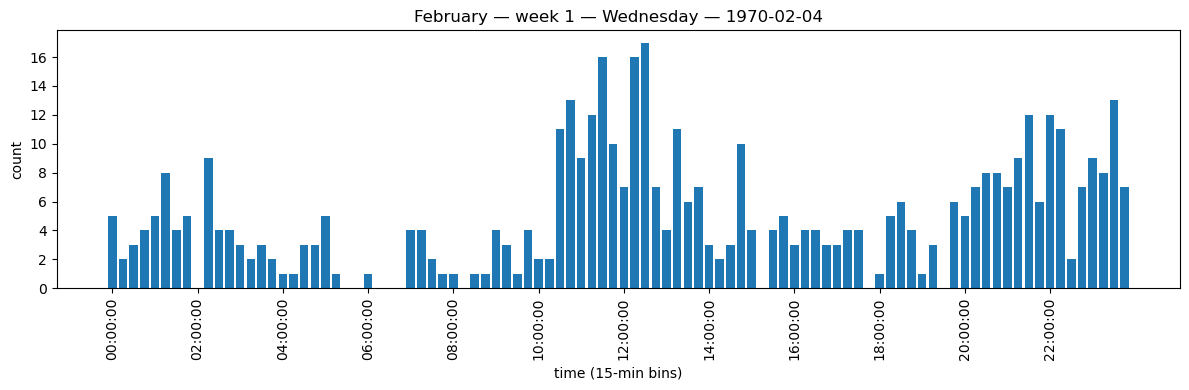

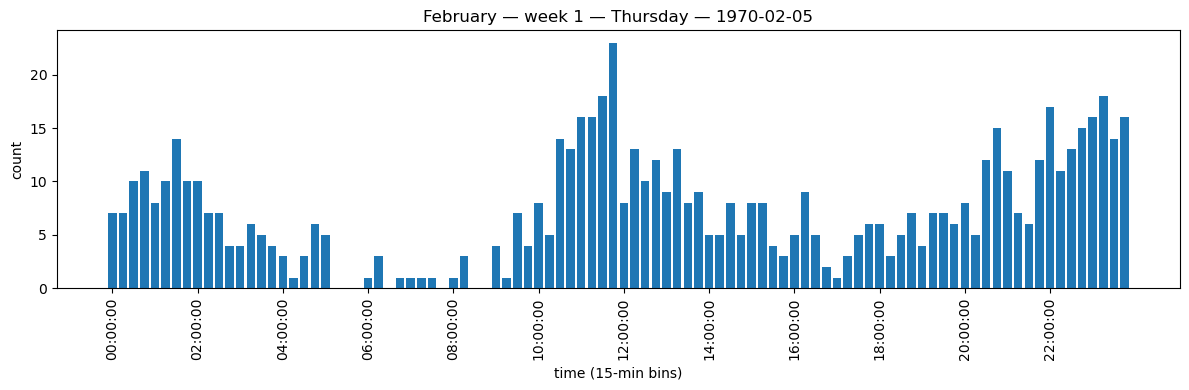

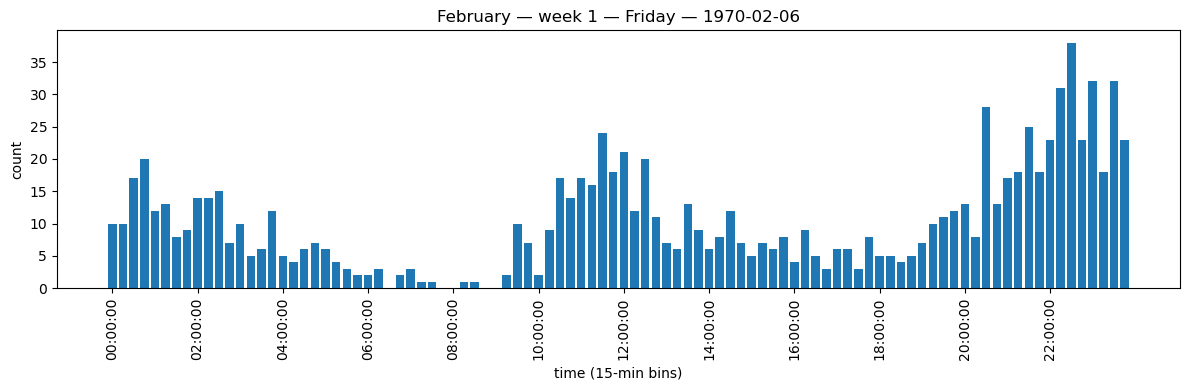

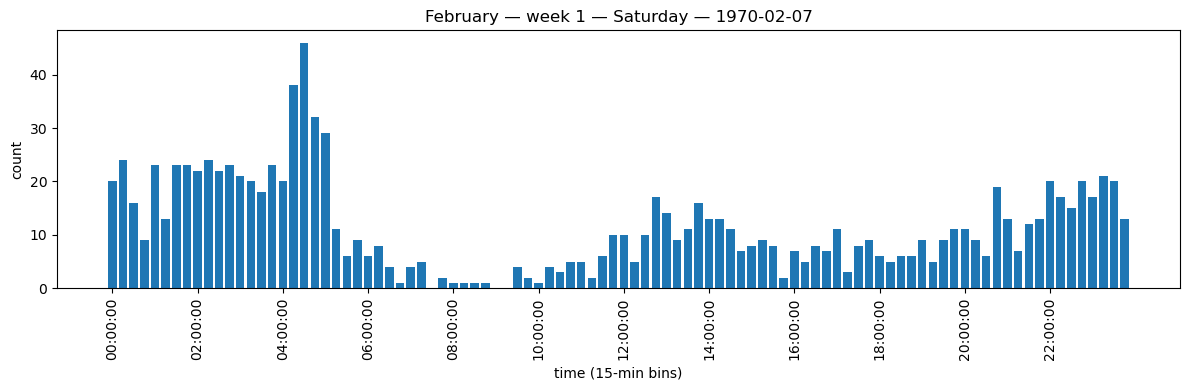

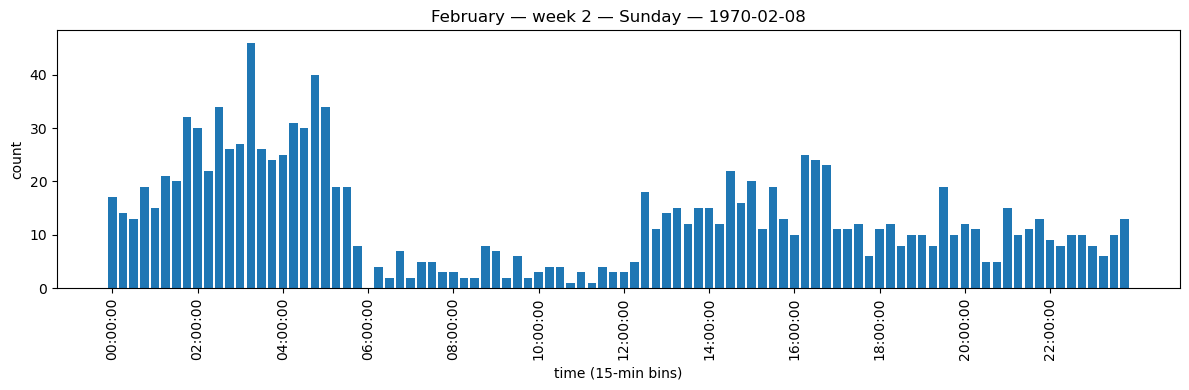

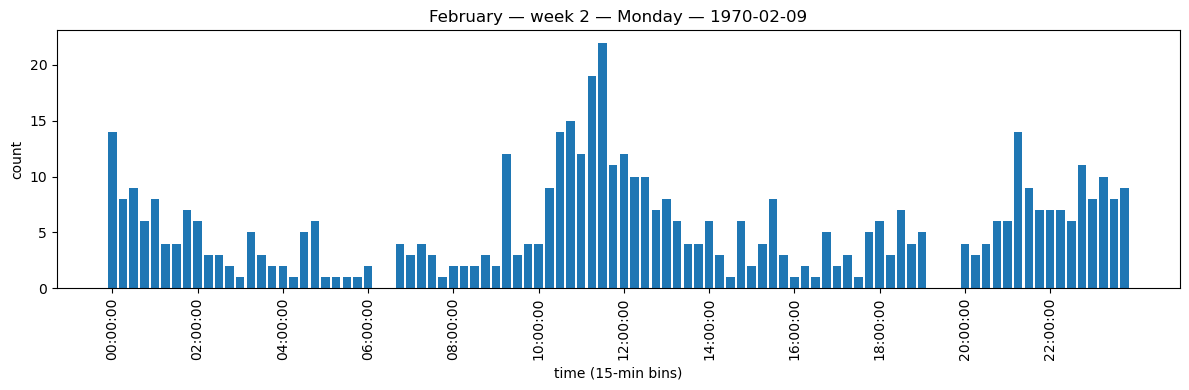

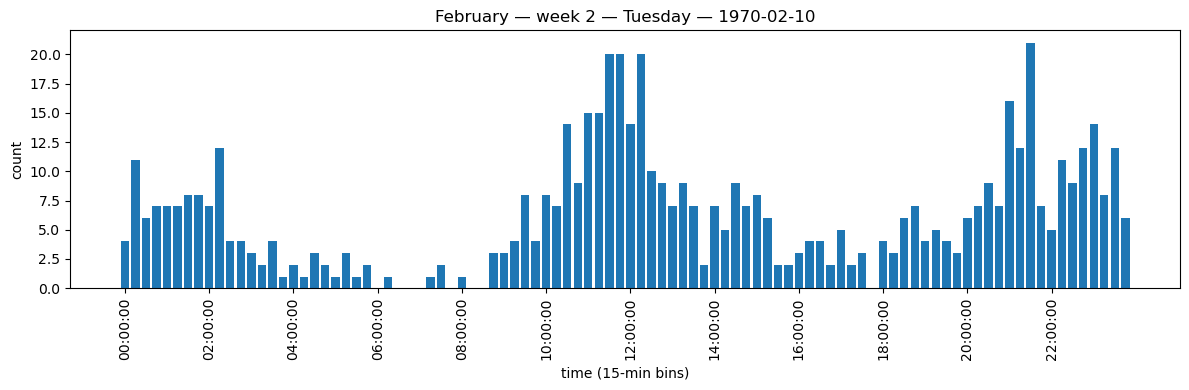

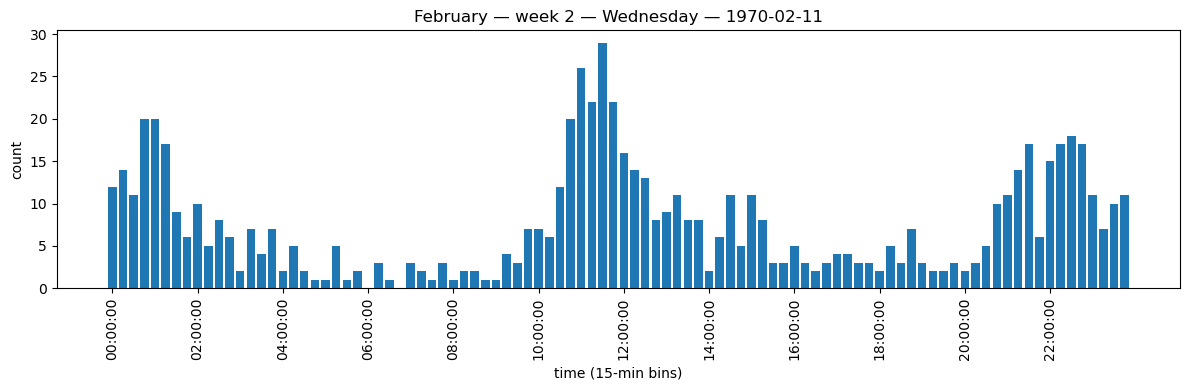

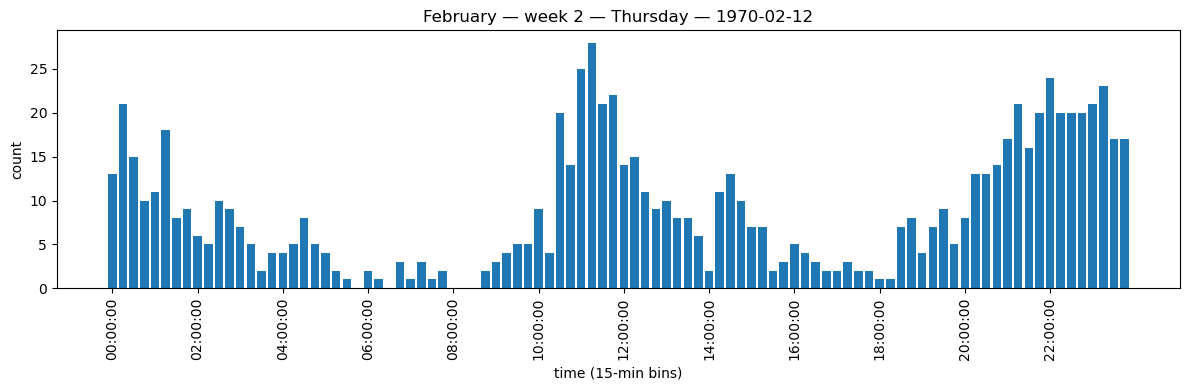

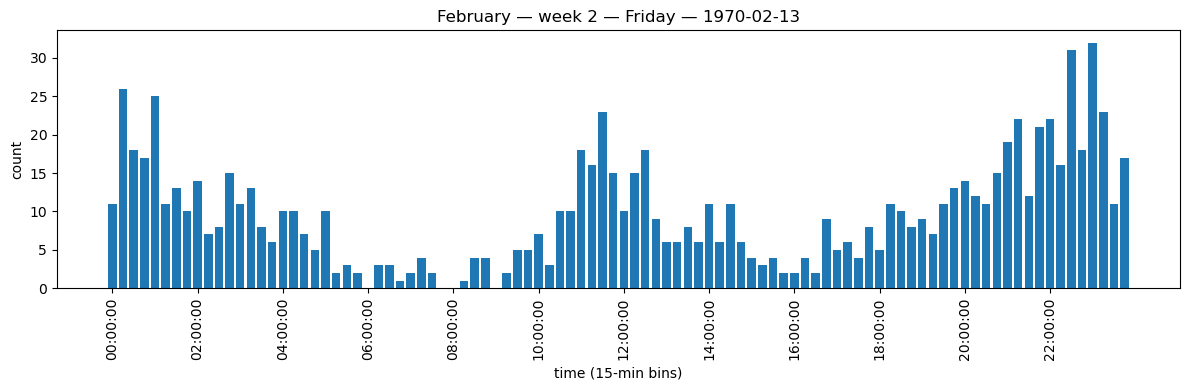

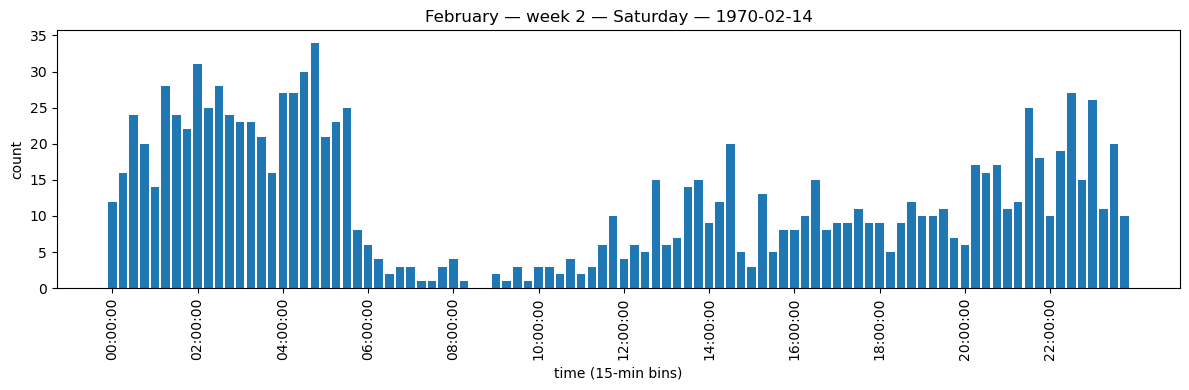

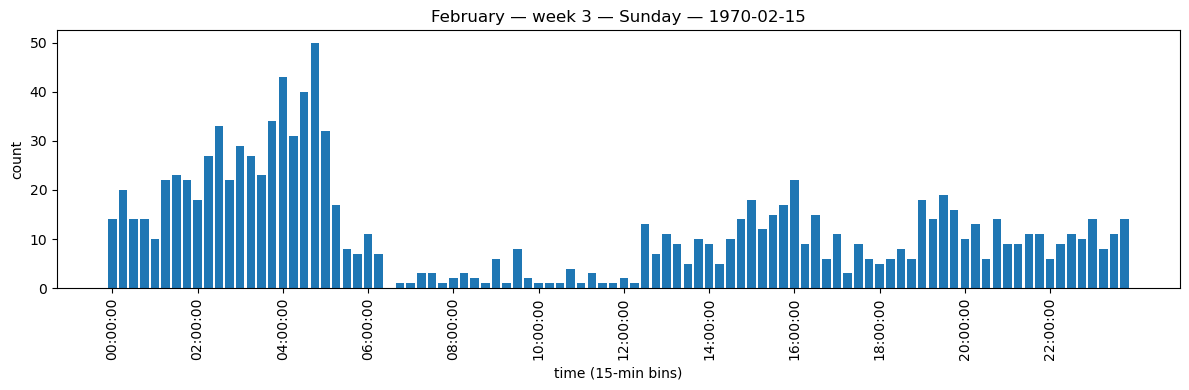

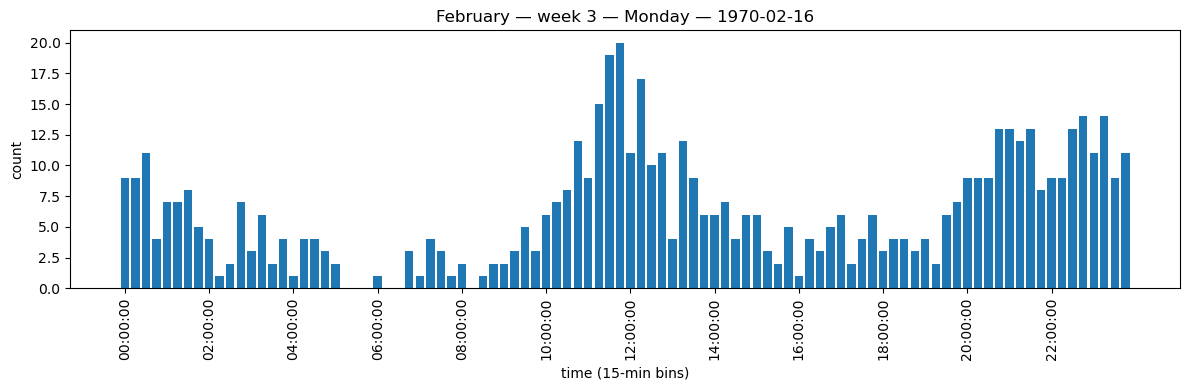

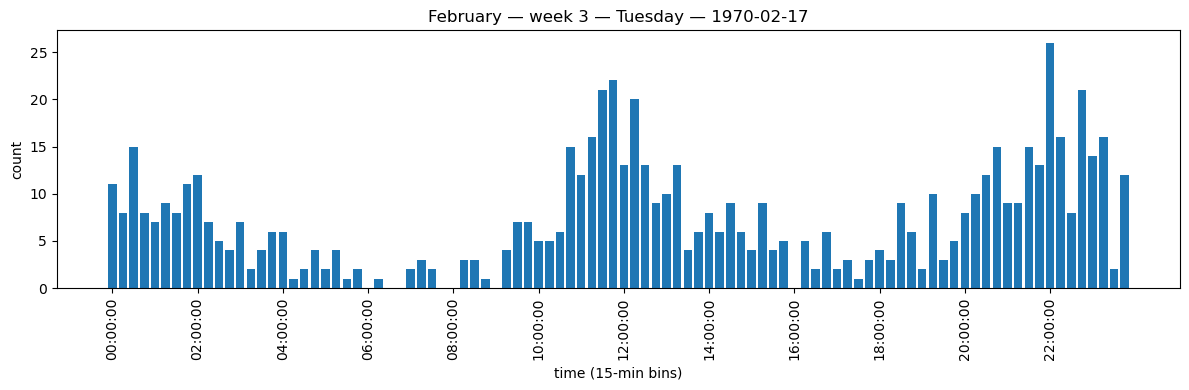

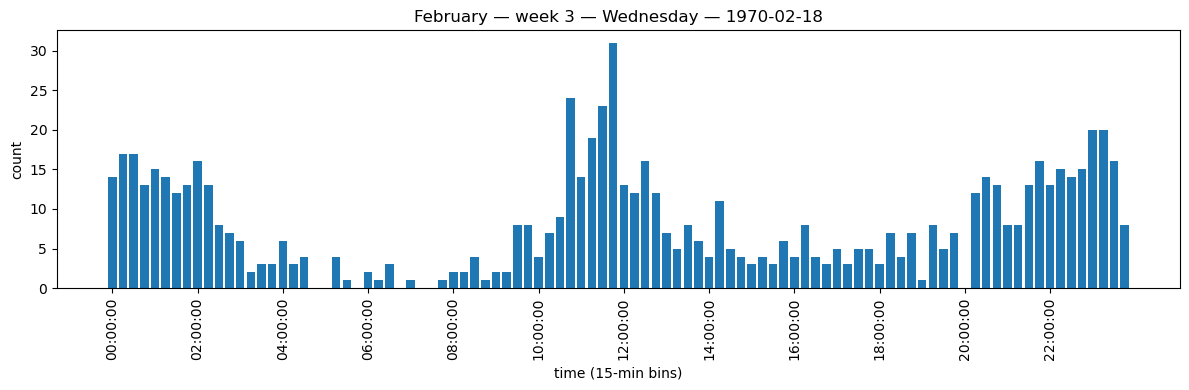

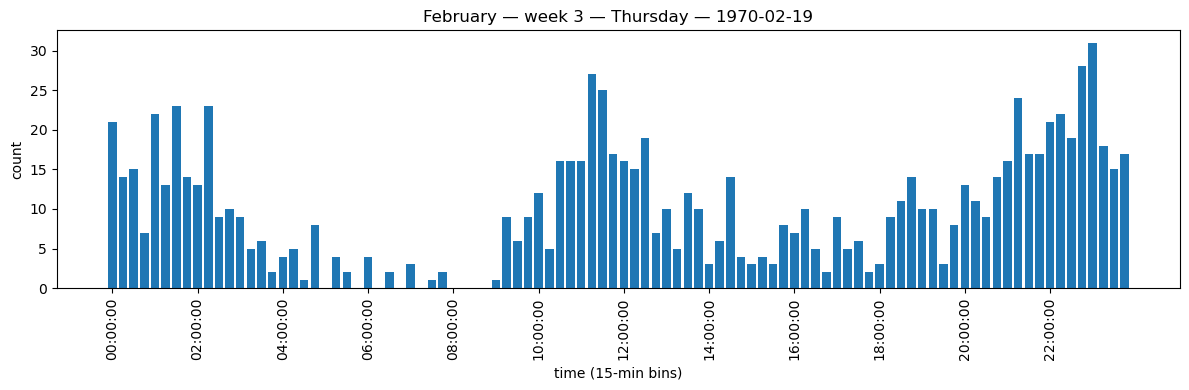

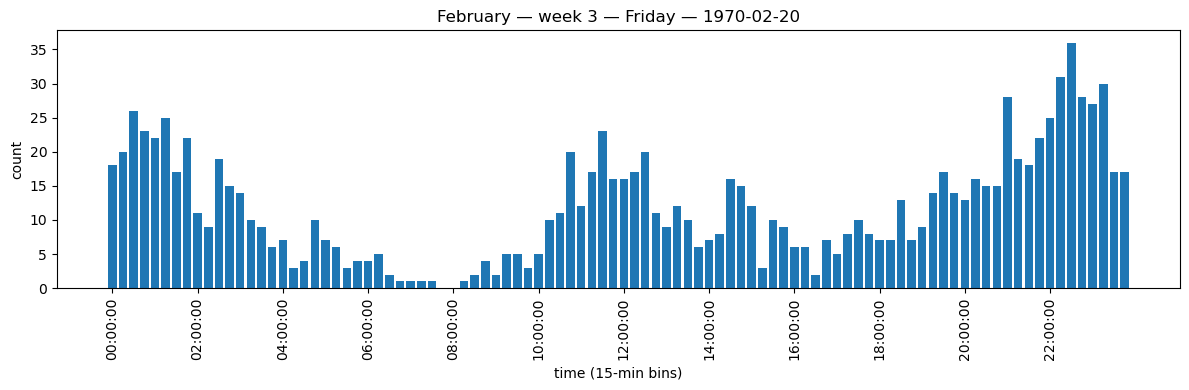

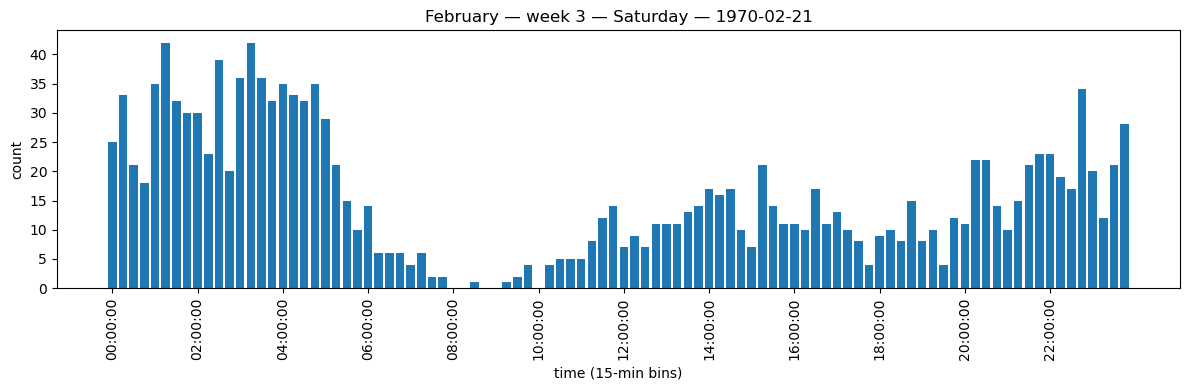

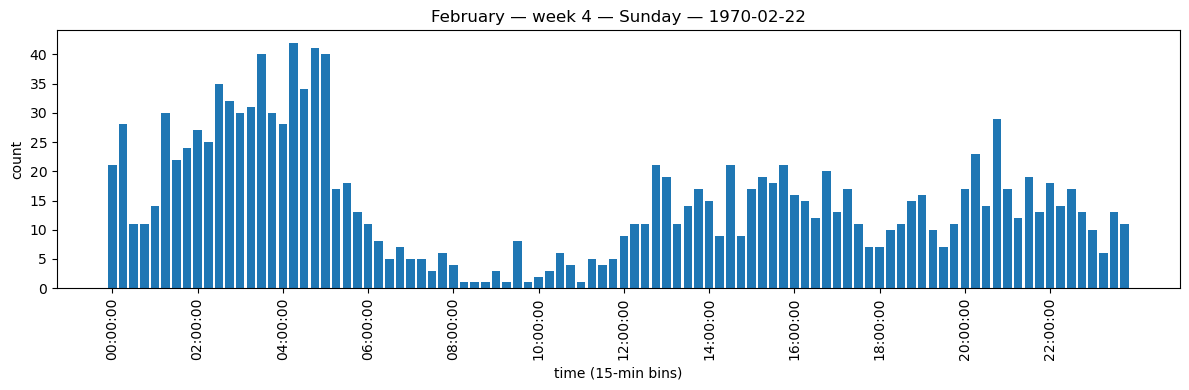

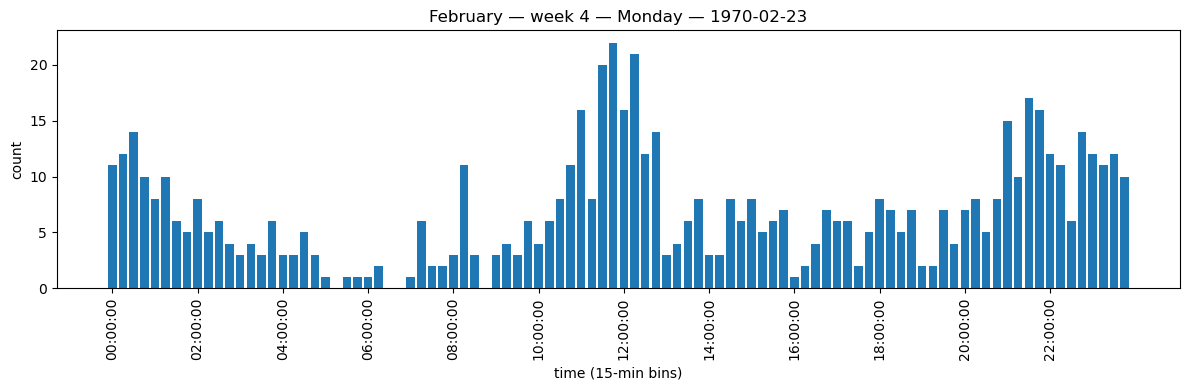

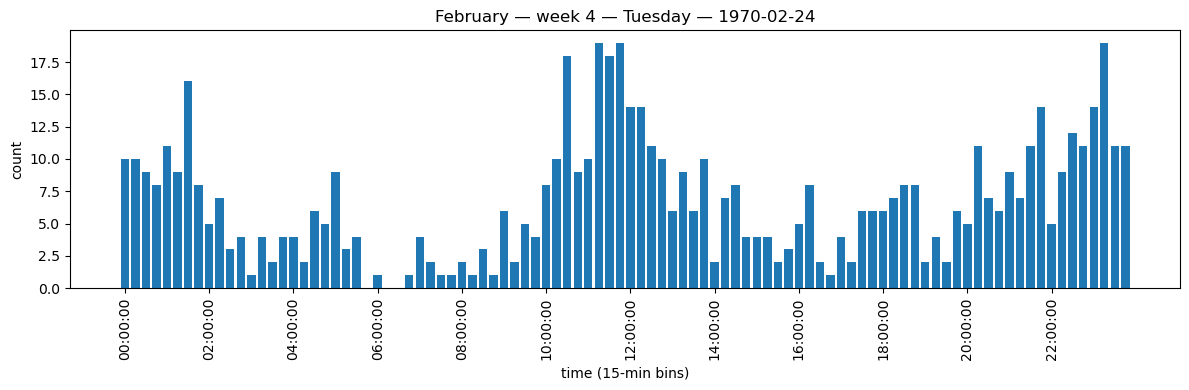

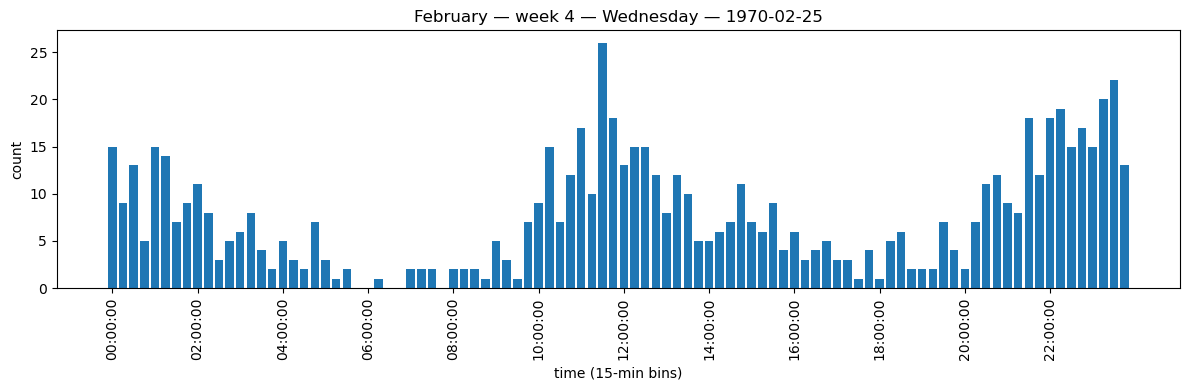

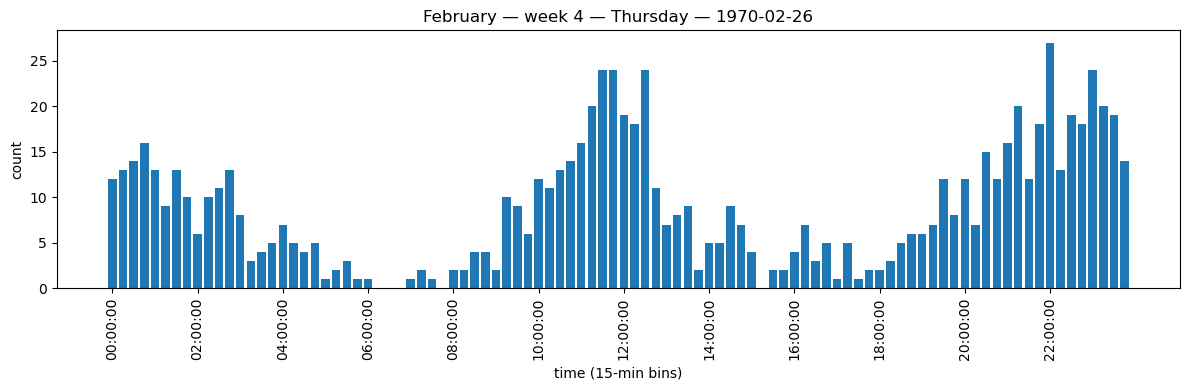

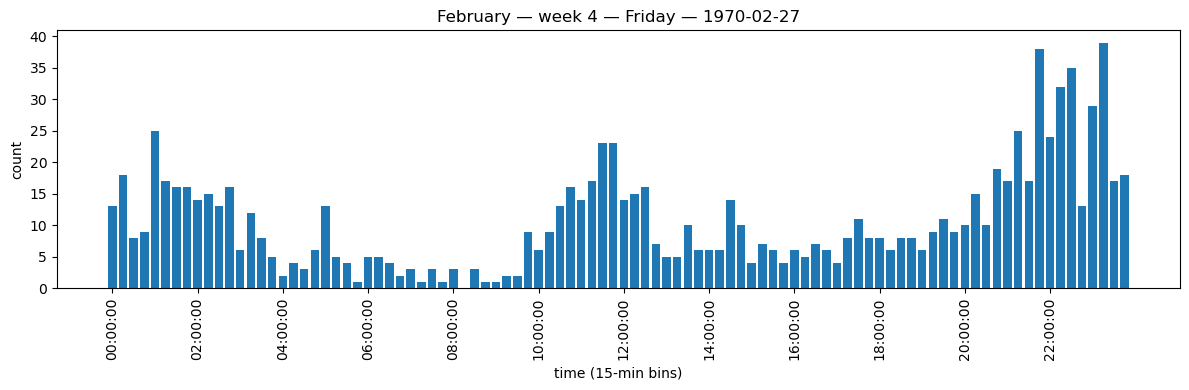

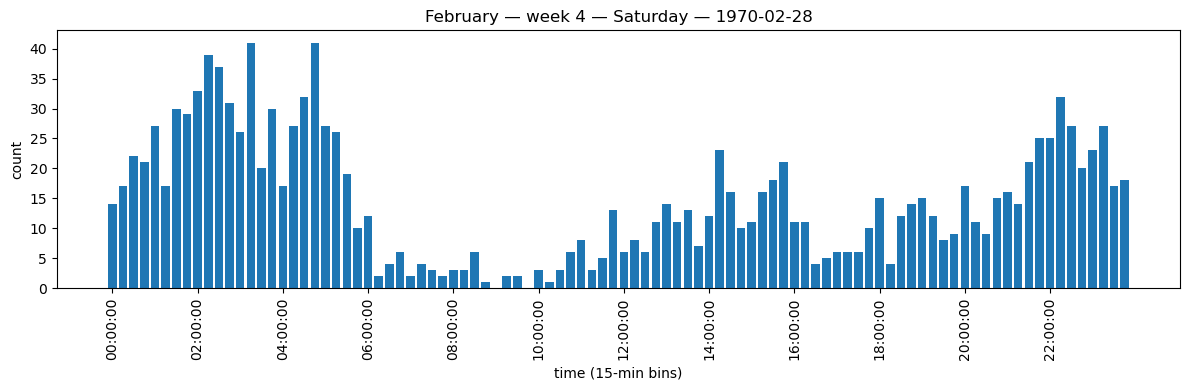

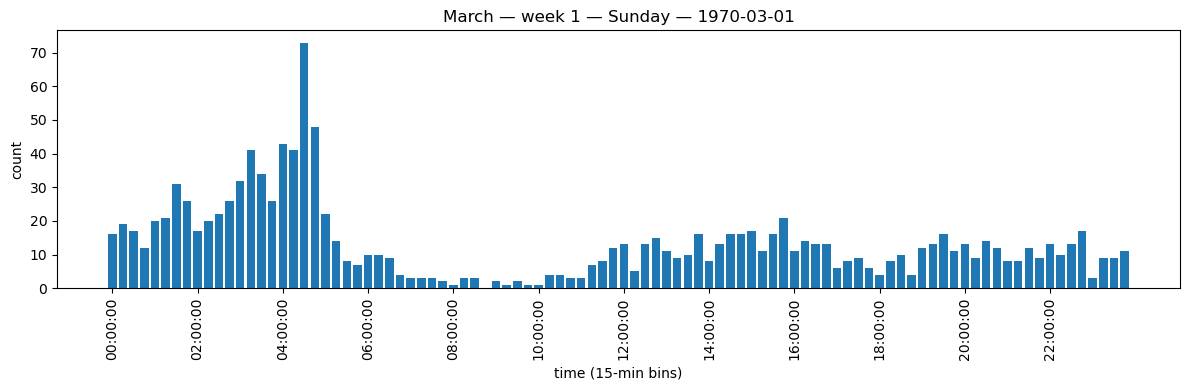

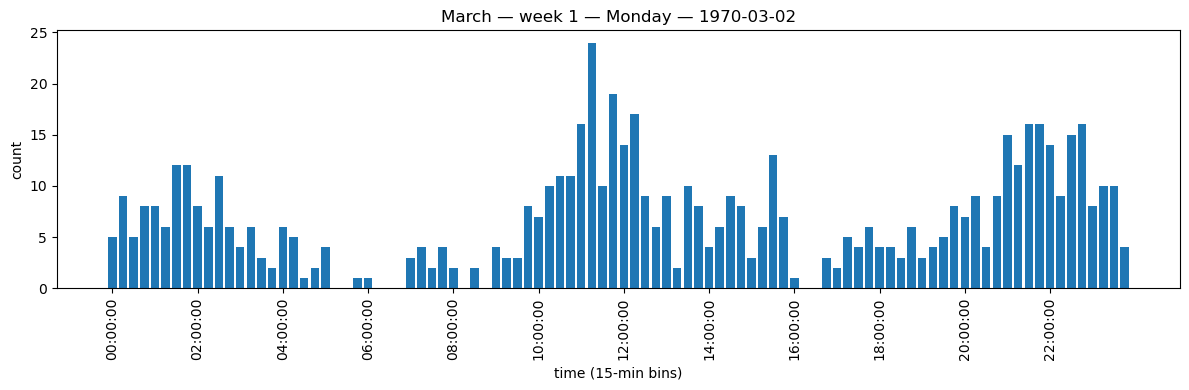

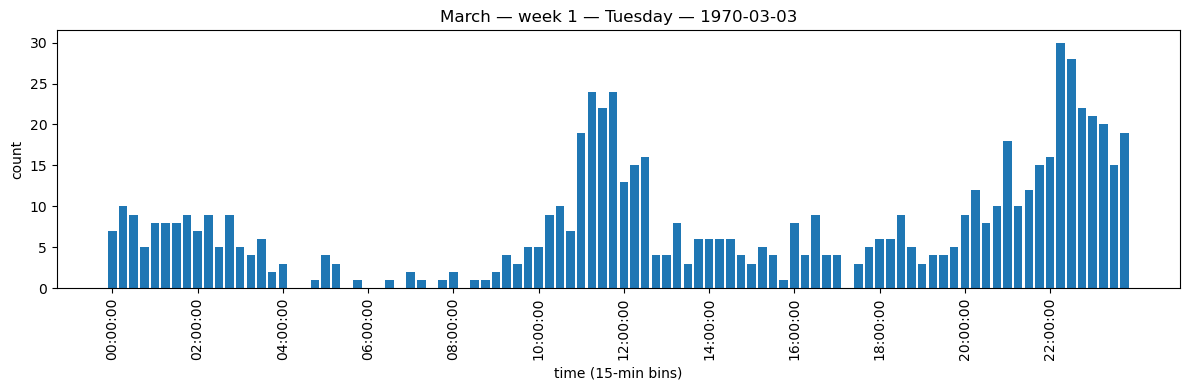

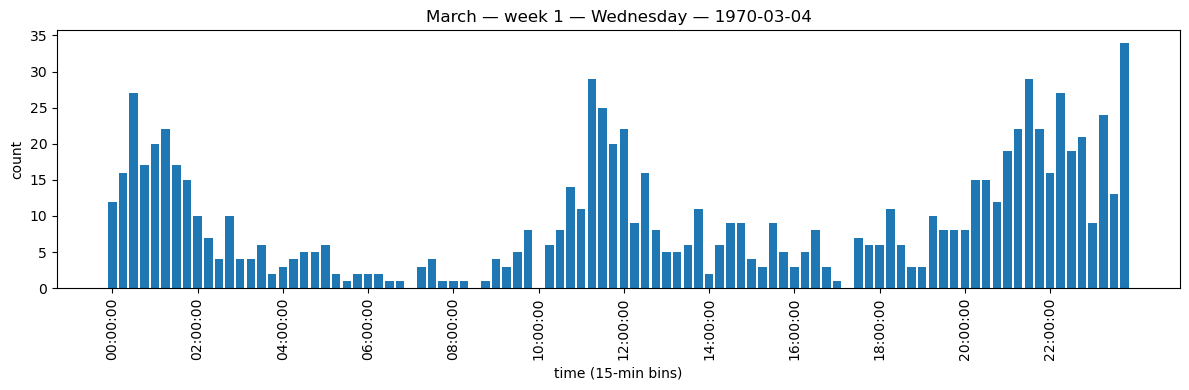

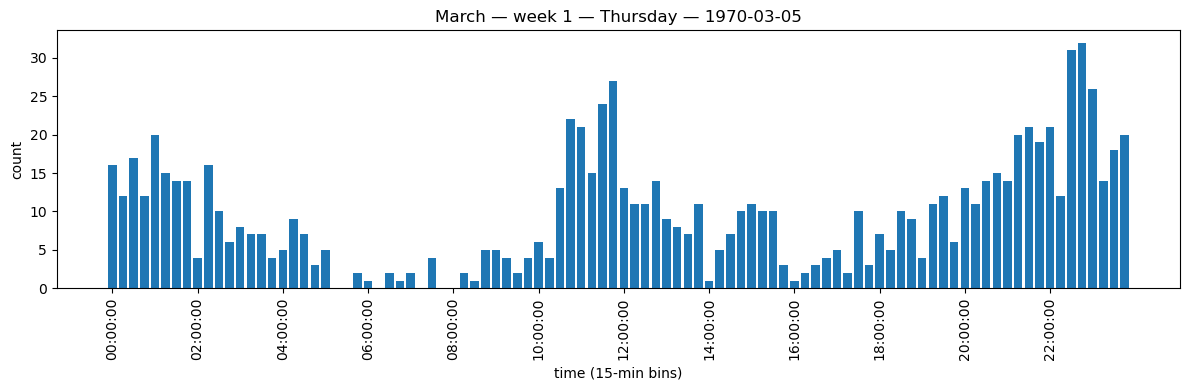

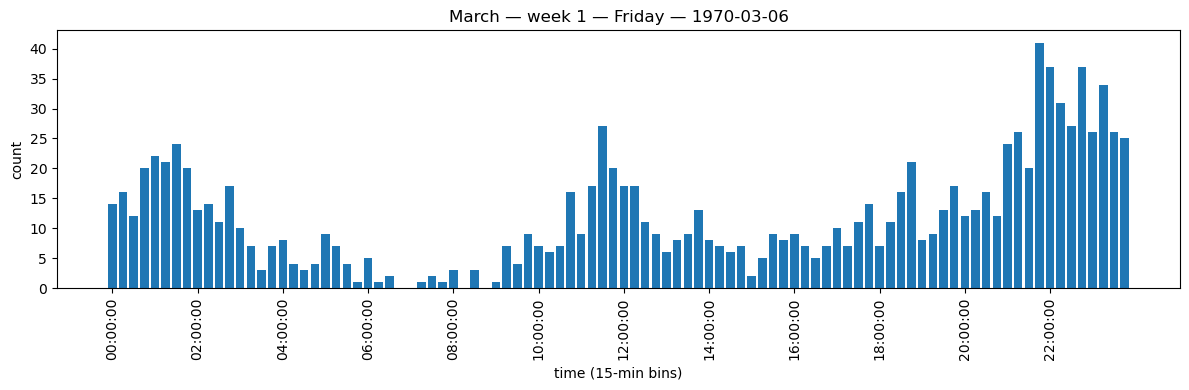

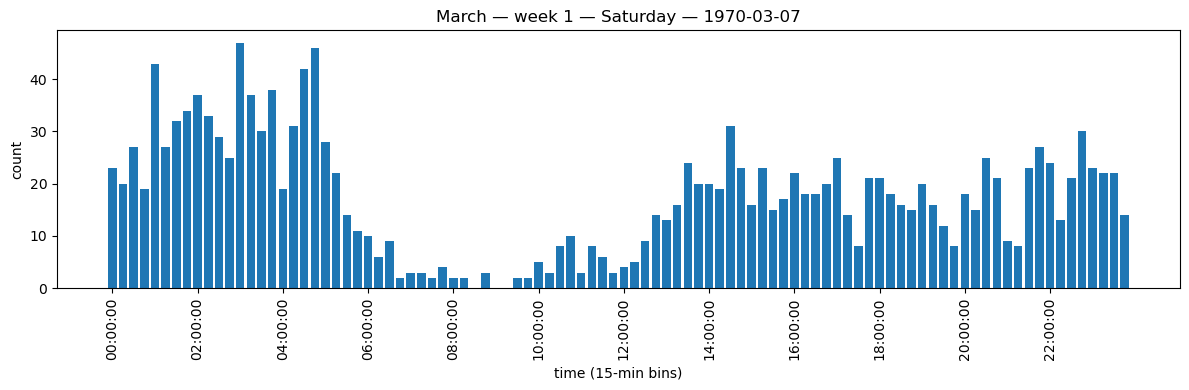

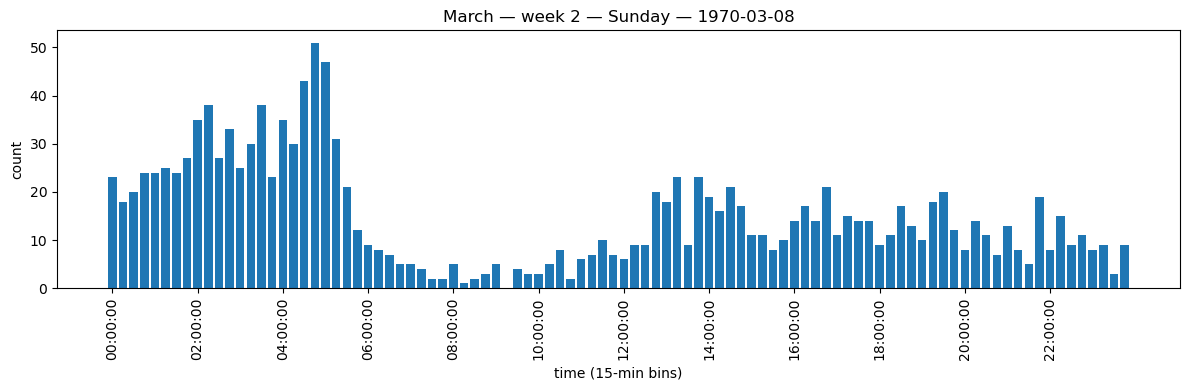

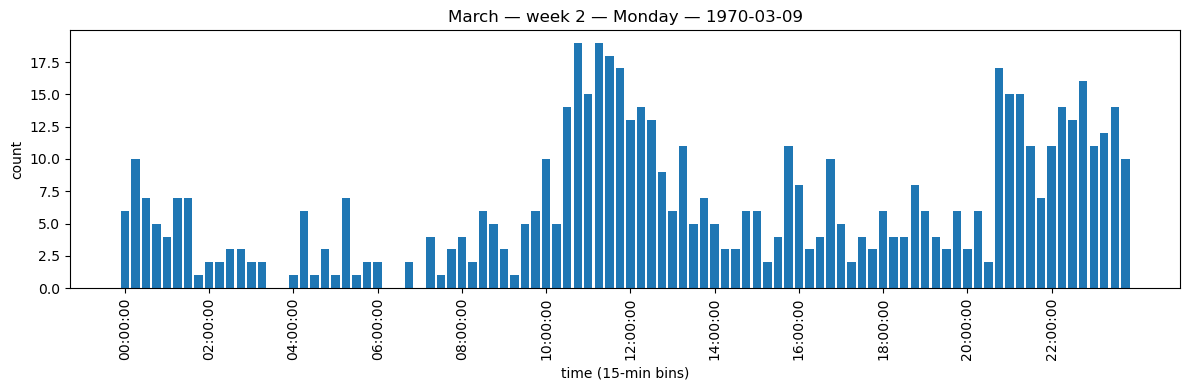

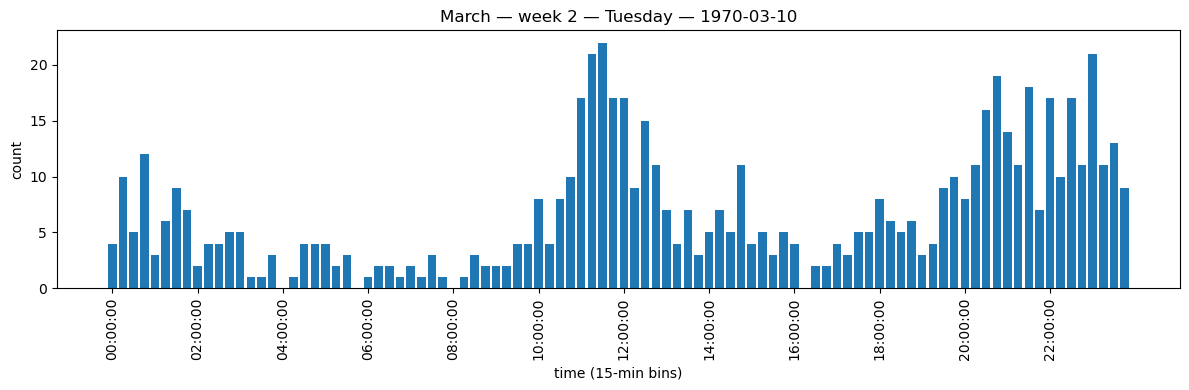

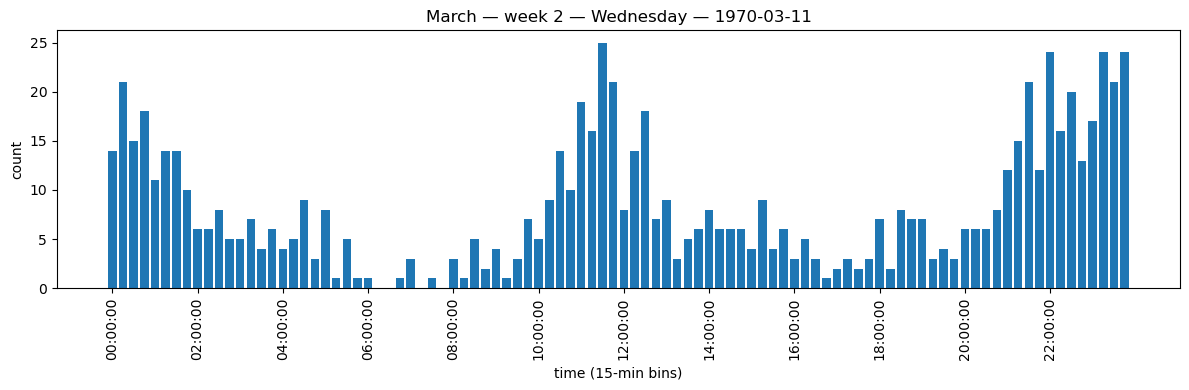

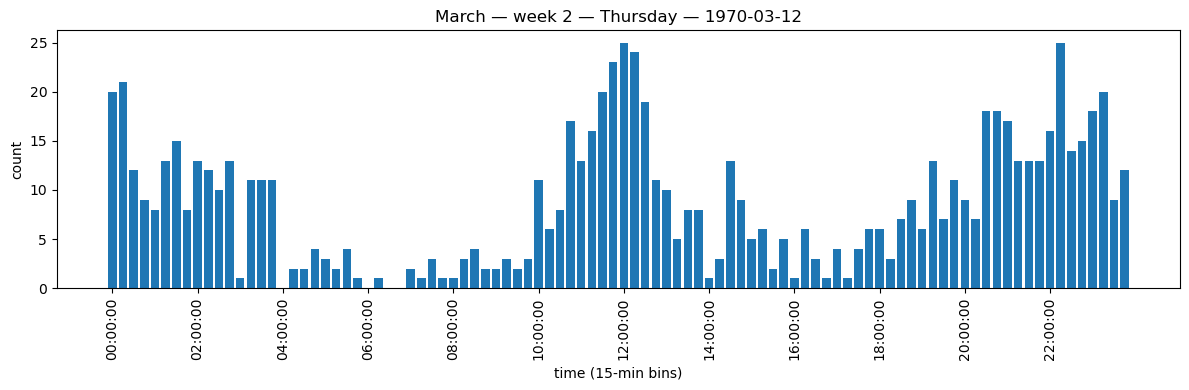

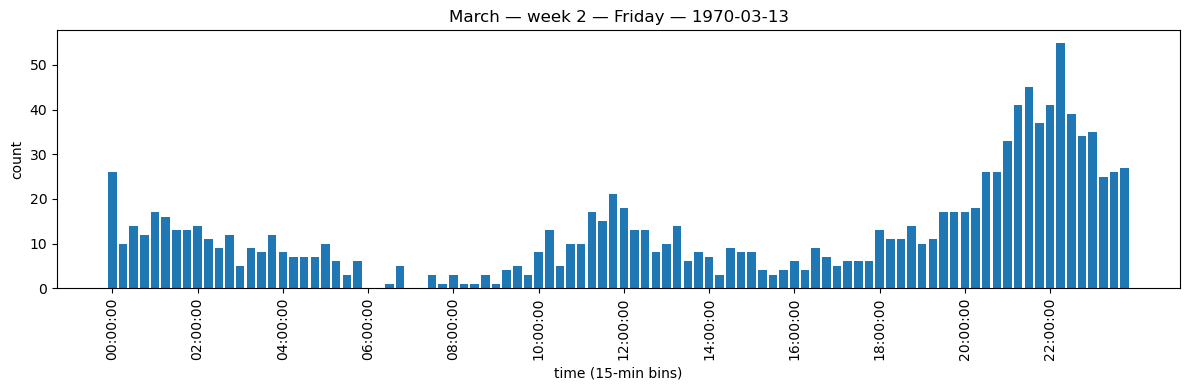

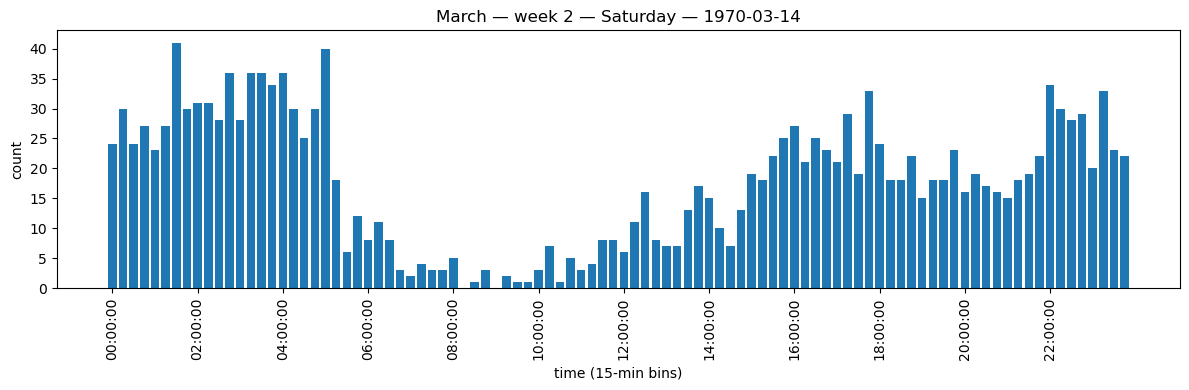

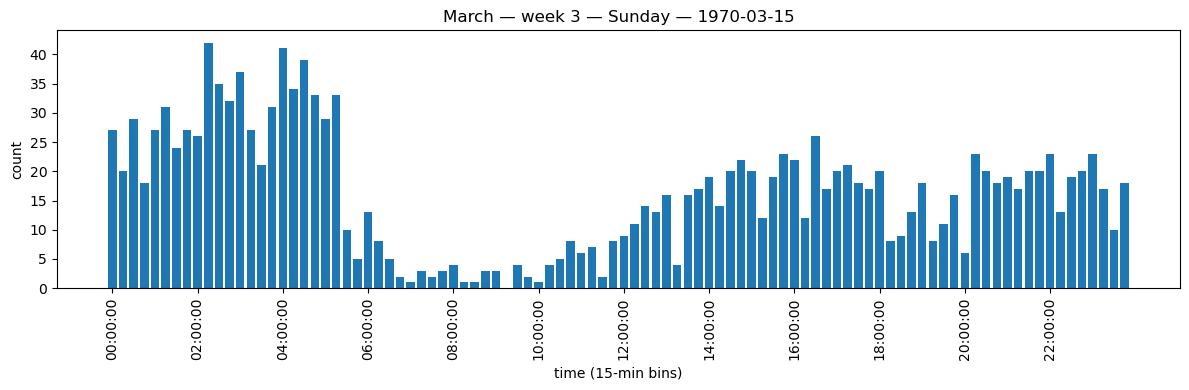

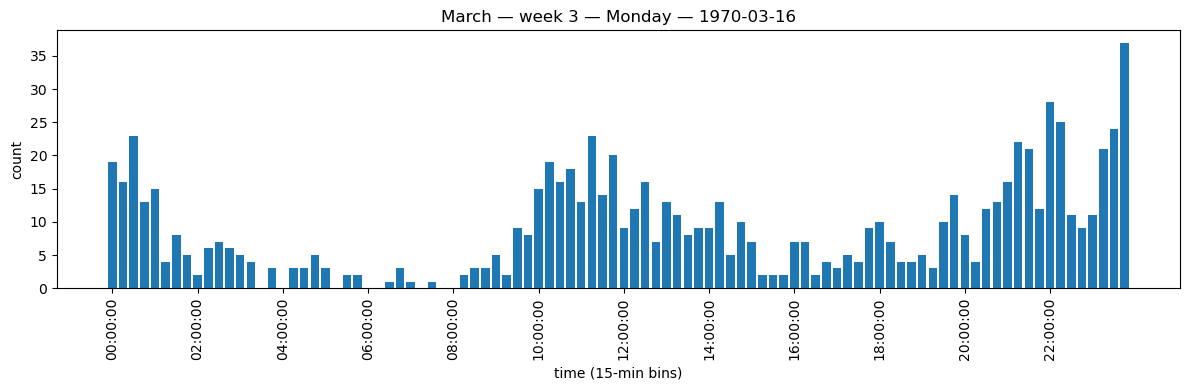

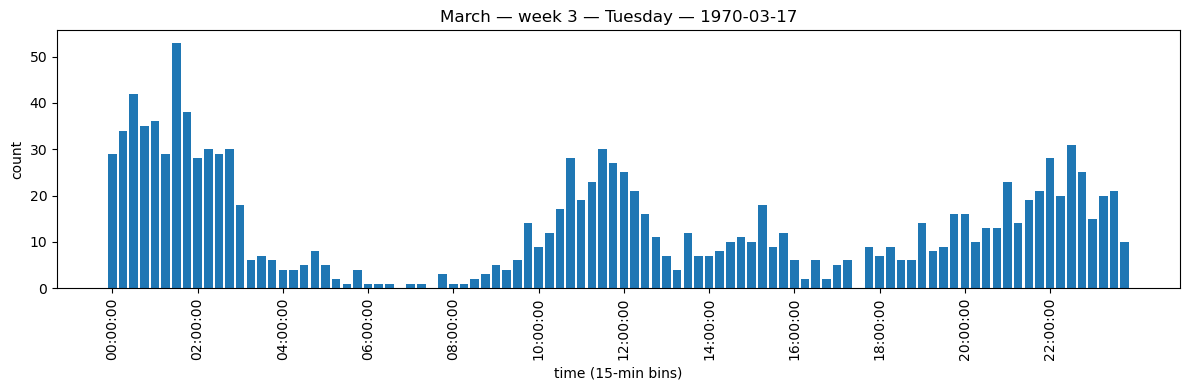

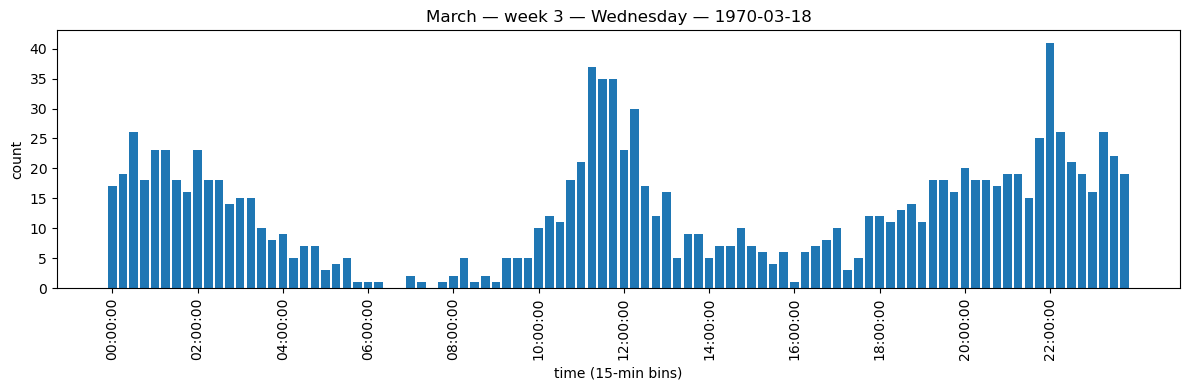

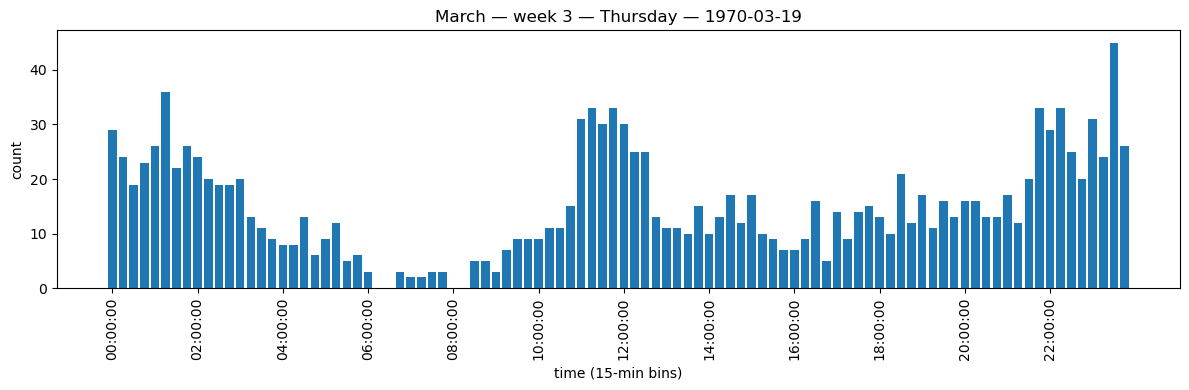

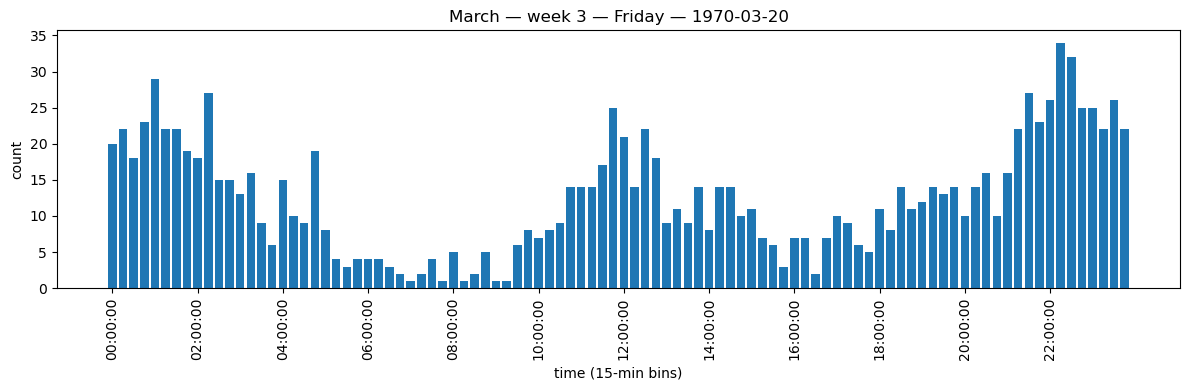

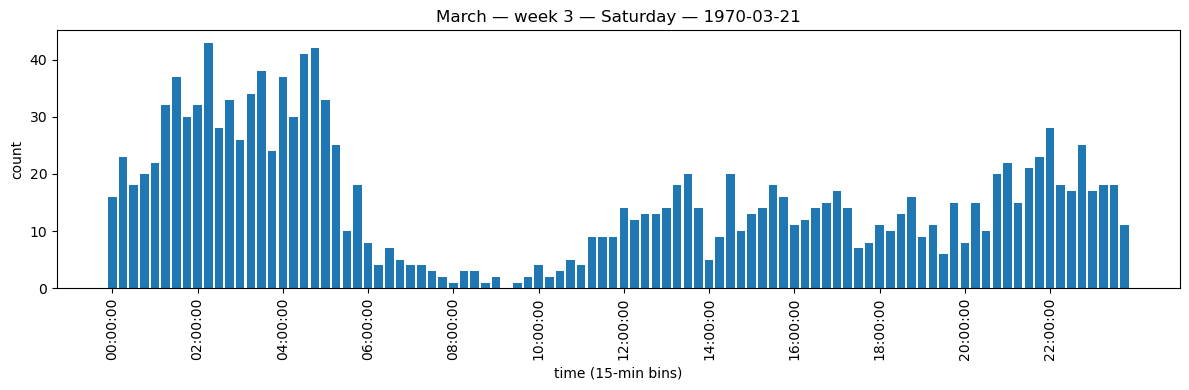

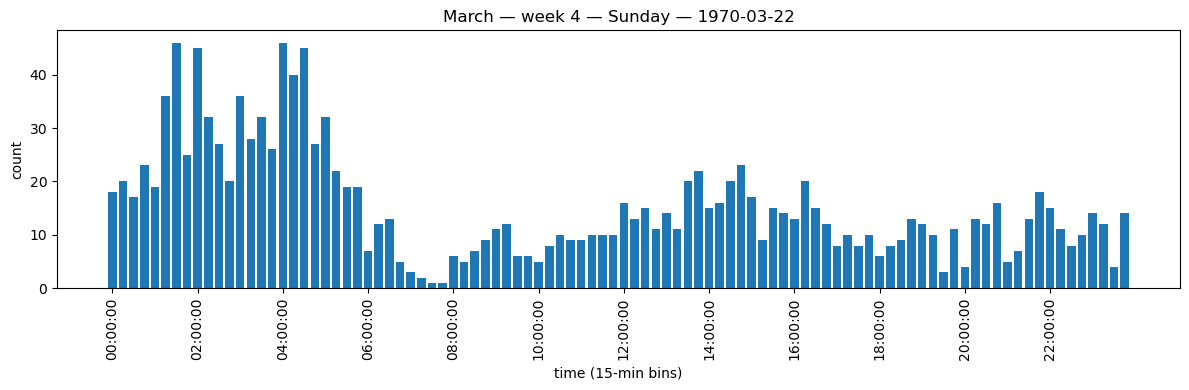

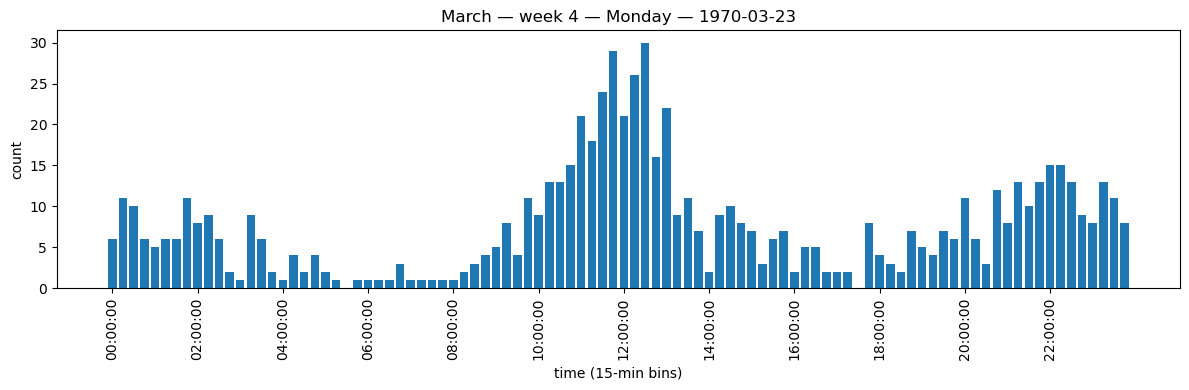

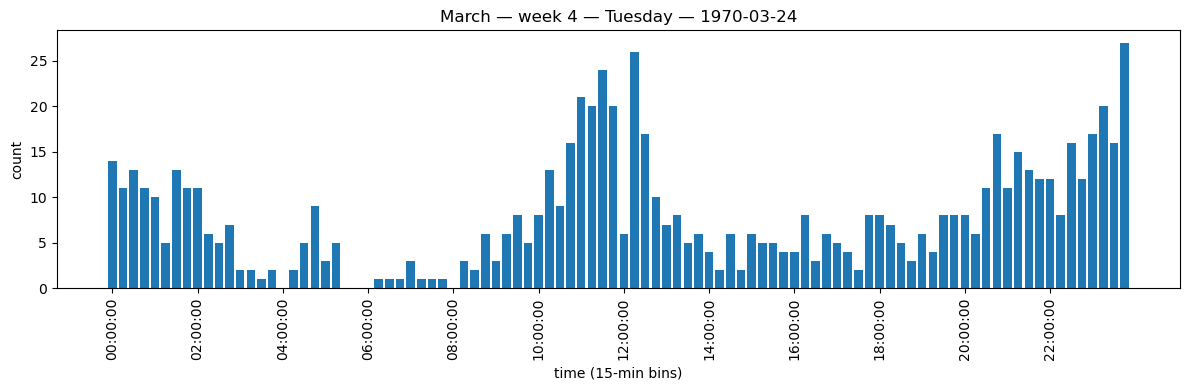

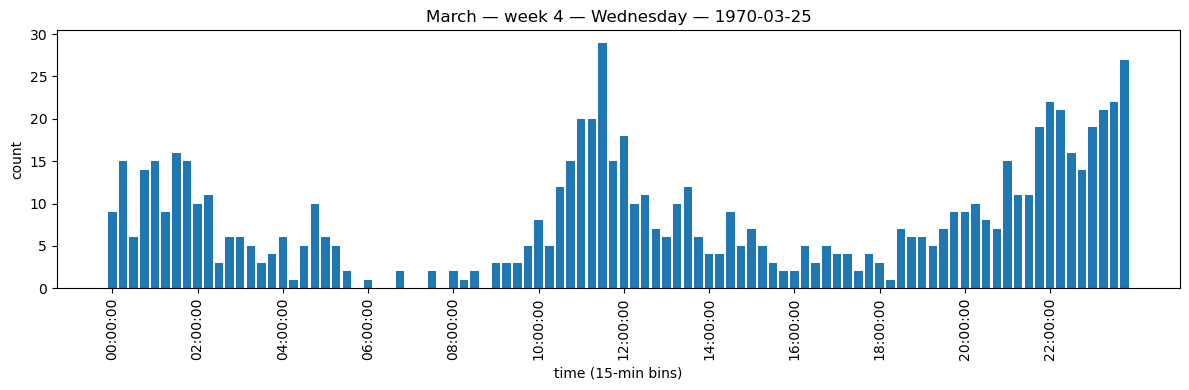

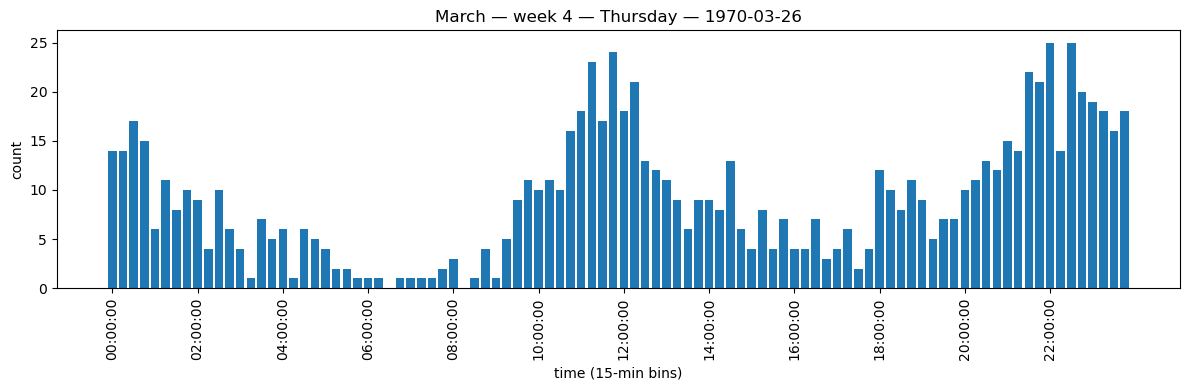

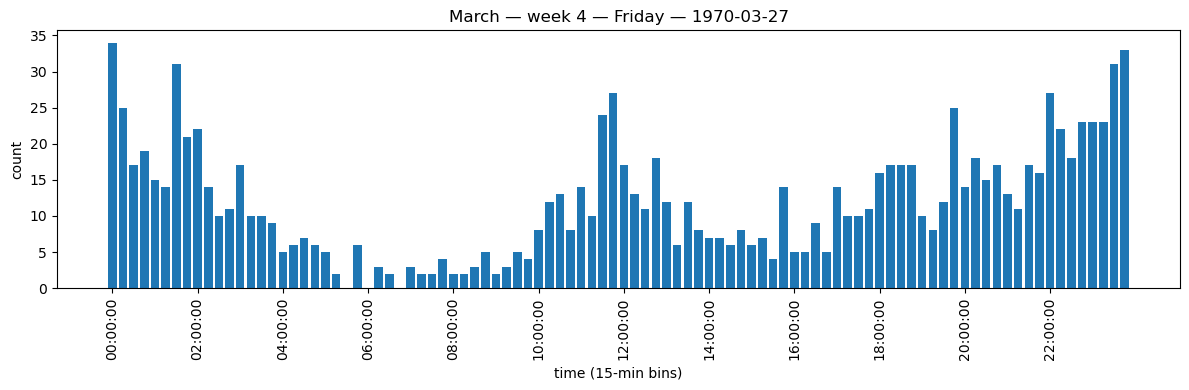

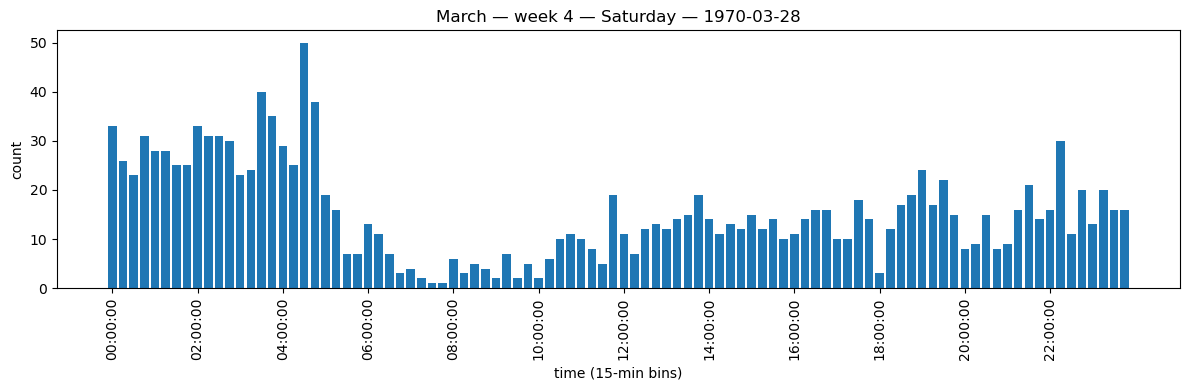

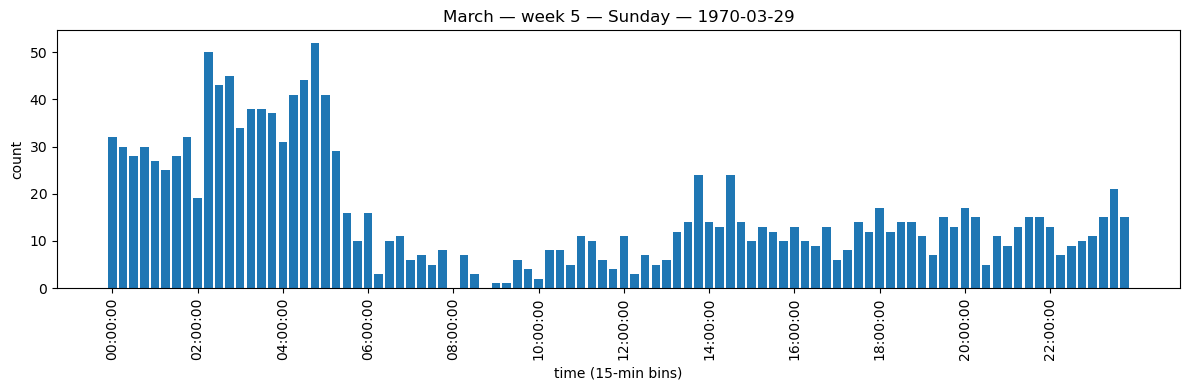

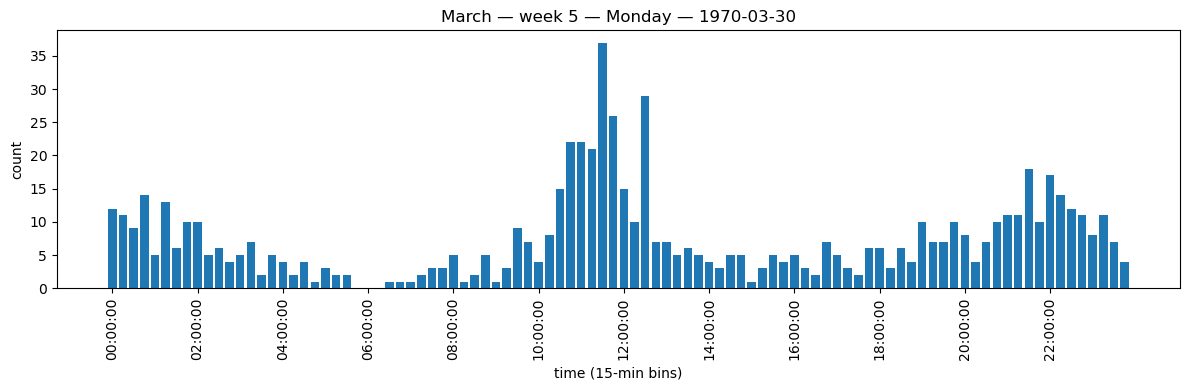

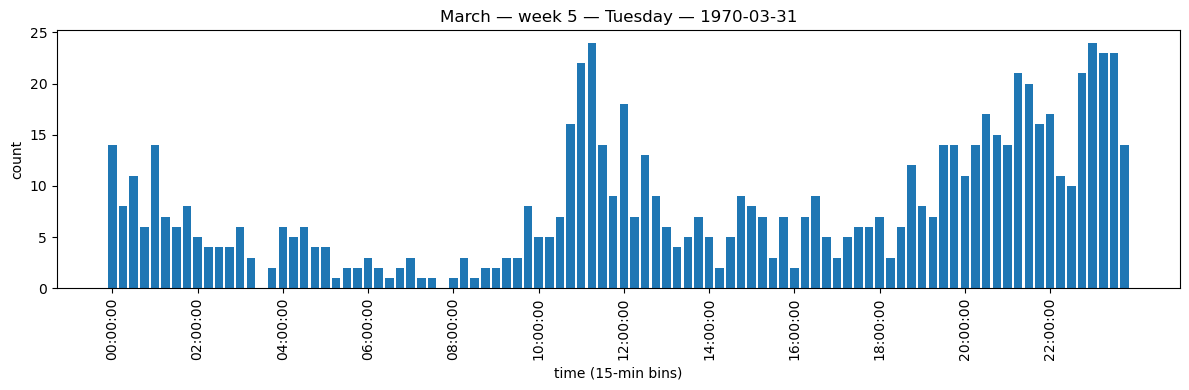

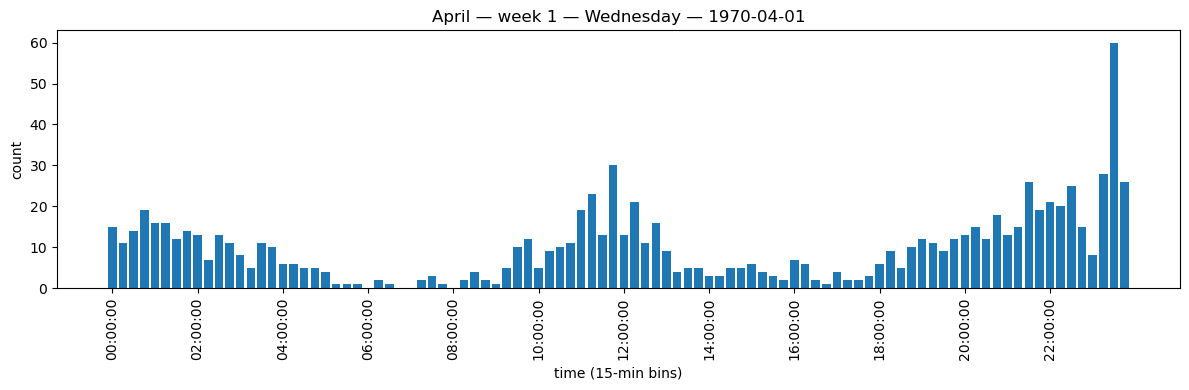

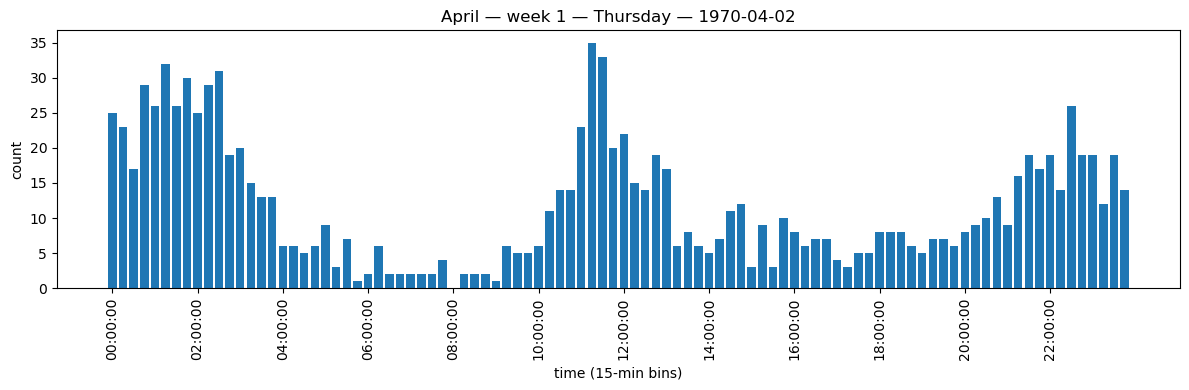

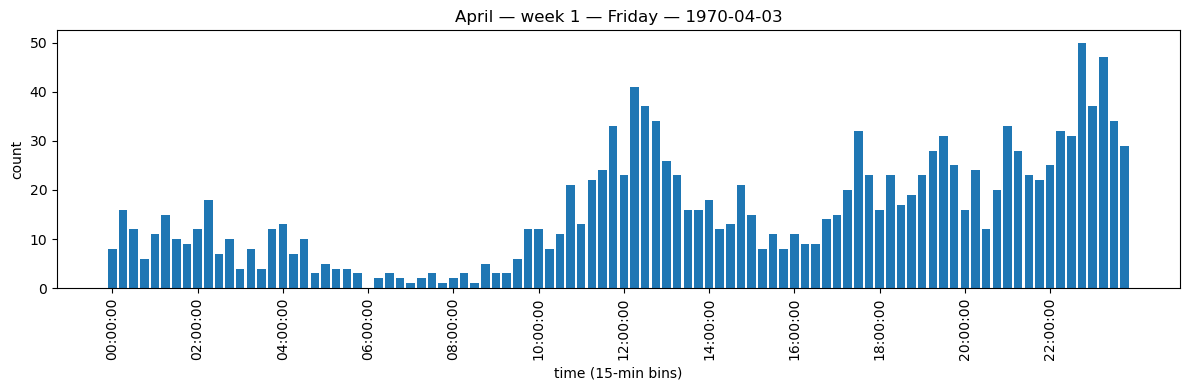

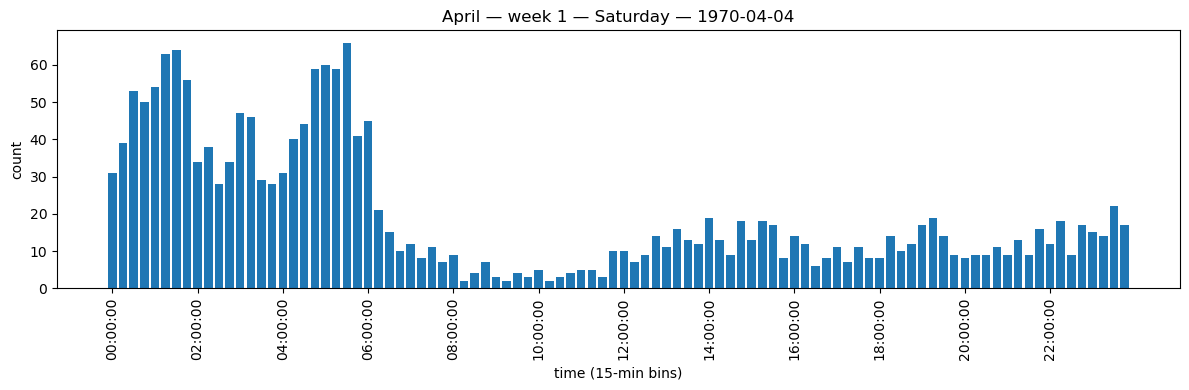

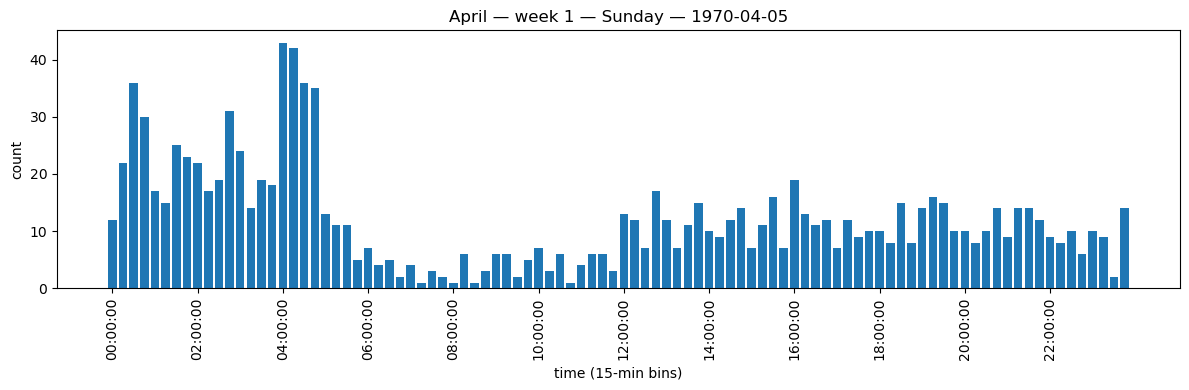

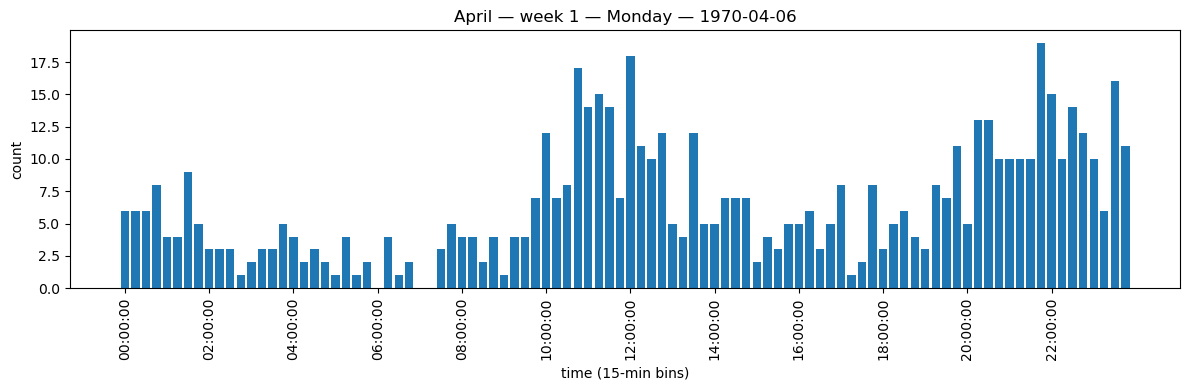

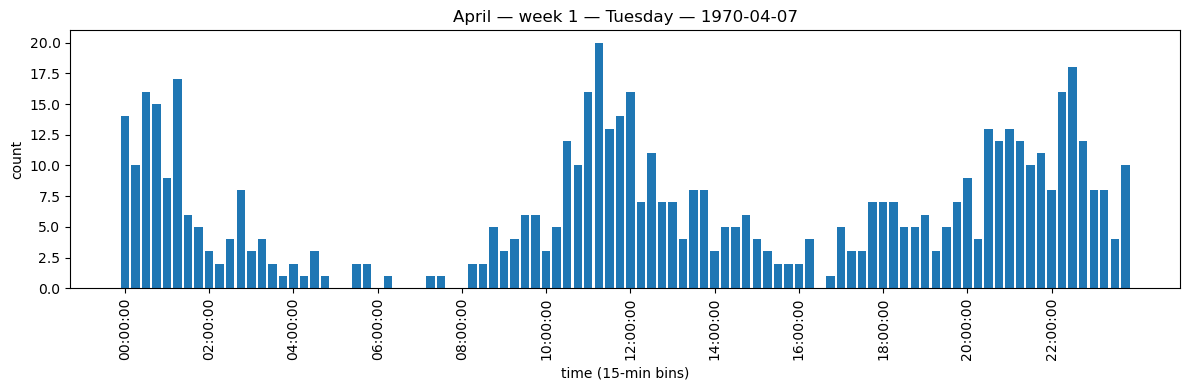

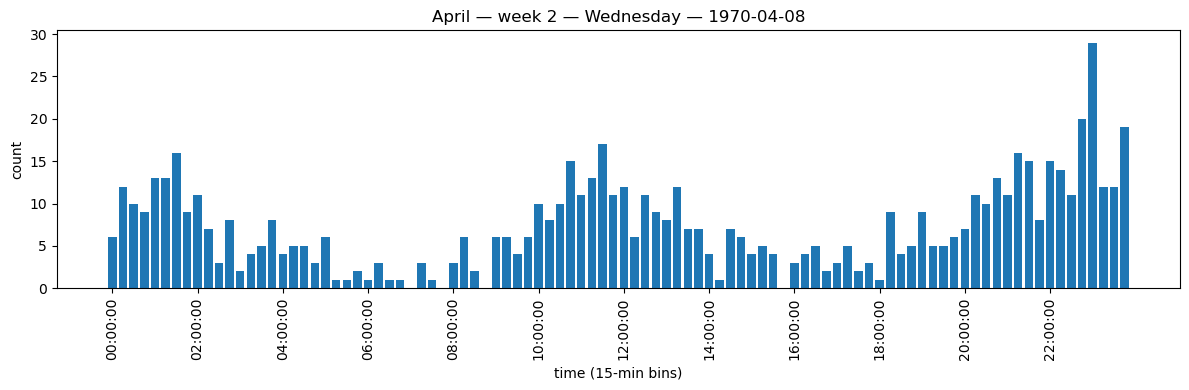

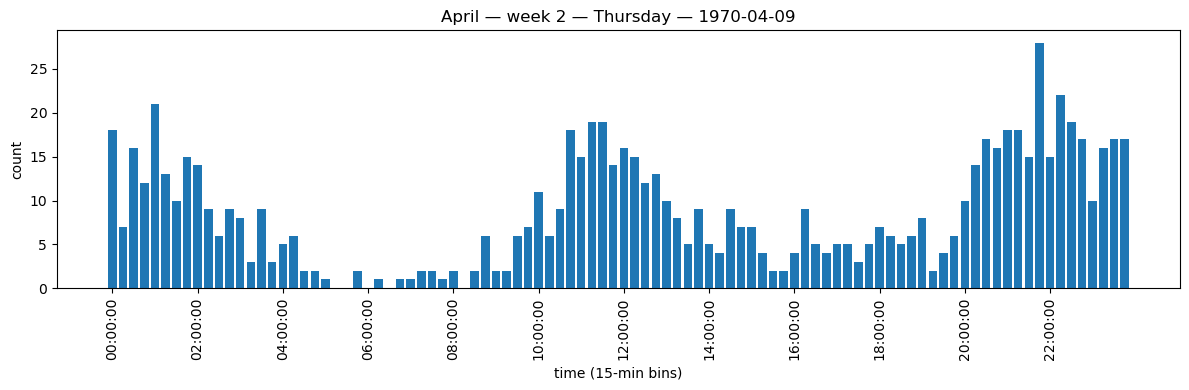

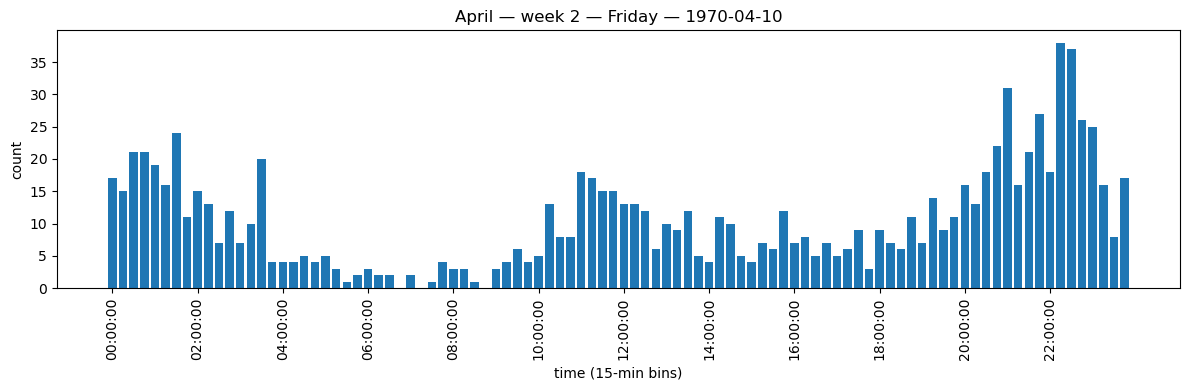

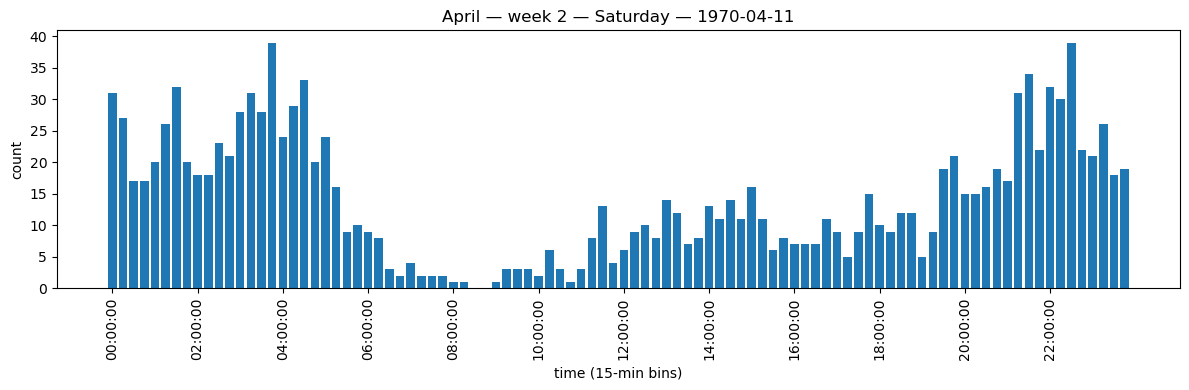

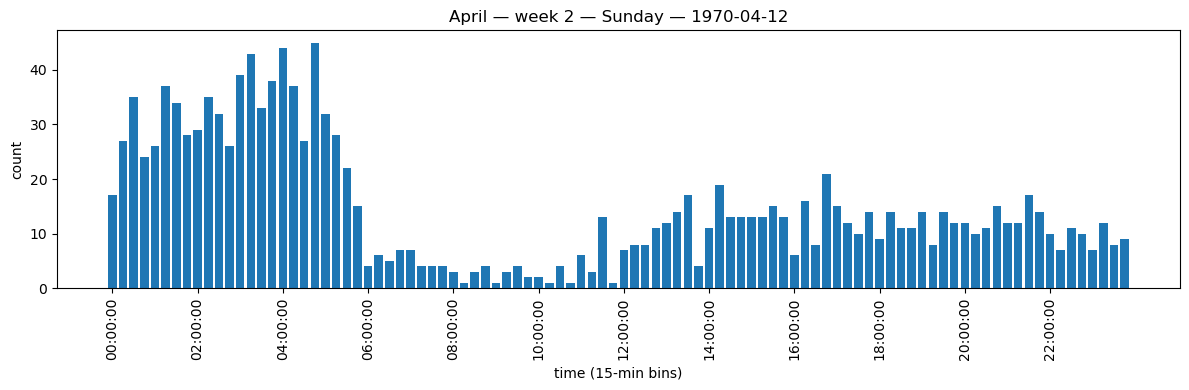

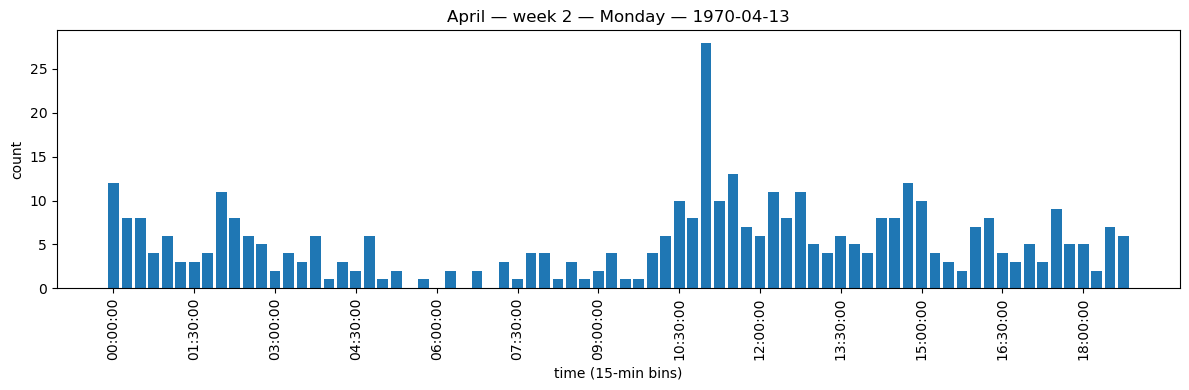

In [35]:
for day, g in login_counts.groupby("date"):
    g = g.sort_values("time")
    meta = g.iloc[0]  # month_name, week_of_month, week_day from that day

    x = g["time"].astype(str).tolist()
    y = g["count"].values
    step = max(1, len(x) // 12)

    plt.figure(figsize=(12, 4))
    plt.bar(x, y)
    plt.xticks(range(0, len(x), step), [x[i] for i in range(0, len(x), step)], rotation=90)
    plt.ylabel("count")
    plt.xlabel("time (15-min bins)")

    title = f"{meta['month_name']} — week {int(meta['week_of_month'])} — {meta['week_day']} — {day}"
    plt.title(title)

    plt.tight_layout()
    plt.show()

## 1.3. Reporting:

Overall, presence of a **daily pattern** which is different between **week days** and **weekend days** (**weekly pattern**):    

**Week day**:  
Peak 1: around 12.00 pm.  
Peak 2: between 10.00 pm and 12.00 am.  

**Weekend day:**  
Peak between 2.00 and and 4.00 am.  

# 2. Part 2 - Experiment and metrics design:

## 2.1. Key measure of success:

Percentage of active drivers who complete at least **one trip in Gotham** and at least **one trip in Metropolis** on the **same weekday.**   

## 2.2. Practical experiment:

### 2.2.1. Experiment implementation:

- **Population** = active drivers in Gotham and Metropolis.  
- Randomized Controlled Trial (**RCT**).  
- **Treatment group** = two-way toll reimbursement.  
- **Control group** = no two-way toll reimbursement.  
- **Scope** = week days as this matches the circadian rhythm between both towns.  
- **Avoid weekend** data as this could dilute the signal.  
- **Each ride** for each driver would have as features:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Date.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Start city.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- End city.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Cross toll.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Toll paid.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Toll reimbursed.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Day tag: 06:00 – 18:00.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Night tag: 18:00 – 06:00.  
- **Duration** = predefined period.

### 2.2.2. Statistical test:

- **Null hypothesis**: Weekday inter-city participation rate is the same in treatment and control.  
- **Alternative hypothesis**: Weekday inter-city participation rate differs between treatment and control with treatment > control.  
- **Test**: z-test.  
- **Significance level**: α = 0.05.  

### 2.2.3. Results & recommendations:

If weekday “inter-city” share is **statistically significant**, recommendation **to continue toll reimbursement**.  
If weekday “inter-city” share is **statistically insignificant**, recommendation **to continue two-way toll**.  

# 3. Part 3 - Predictive modeling:

## 3.1. Data wrangling:

### 3.1.1. Data inspection:

In [51]:
df3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [52]:
df3.shape

(50000, 12)

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [54]:
df3_info = pd.DataFrame({
    "column": df3.columns,
    "non_null_count": df3.notnull().sum().values,
    "dtype": df3.dtypes.values
})

In [55]:
date_dtype = list(df3_info.loc[df3_info["column"].str.contains("date"), "column"])
date_dtype

['signup_date', 'last_trip_date']

In [56]:
missing_vals = list(df3_info.loc[df3_info["non_null_count"] != df3.shape[0], "column"])
missing_vals

['avg_rating_of_driver', 'phone', 'avg_rating_by_driver']

### 3.1.2. Data types:

In [58]:
for c in date_dtype:
    df3[c] = pd.to_datetime(df3[c], errors="coerce")

### 3.1.3. Missing values:

**CATEGORICAL FEATURES:**

In [61]:
cat = missing_vals.pop(1)
phone_mode = df3[cat].mode()[0]
df3[cat] = df3[cat].fillna(phone_mode)

**NUMERICAL FEATURES:**

In [63]:
for m in missing_vals:
    df3[m] = df3[m].fillna(df3[m].mean())

**CHECK:**

In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### 3.1.4. Duplicates:

In [67]:
df3_cols = df3.columns
df3_cols

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [68]:
dup = df3.duplicated(subset=df3_cols).sum()
print(f"Duplicates: {dup}")

Duplicates: 8


In [69]:
df3 = df3.drop_duplicates(subset=df3_cols)

In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49992 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    49992 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49992 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49992 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1)

### 3.1.5. Target label:

**RETENTION** = a user is considered as **"retained"** if they are **still active** in the **30 days preceding** the **6-month mark** after their signup date.

In [73]:
# 6-month mark:
df3["check_date"] = df3["signup_date"] + pd.to_timedelta(6*30, unit="D")

# 30-day retention window:
df3["retention_start"] = df3["check_date"] - pd.Timedelta(days=30)

# retained taget label:
df3["retained"] = (
    (df3["retention_start"]<= df3["last_trip_date"])
    &
    (df3["last_trip_date"] <= df3["check_date"])
).astype(int)

In [74]:
df3.drop(["check_date", "retention_start"], axis=1, inplace=True)

In [75]:
df3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [76]:
df3["retained"].value_counts()

retained
0    37291
1    12701
Name: count, dtype: int64

## 3.2. Exploratory data analysis - EDA:

The initial dataset will be **split** into two datasets — **retained** and **non-retained** users — and compare the distribution of each feature across these groups to identify **noticeable** trends or differences.”  
**CATEGORICAL FEATURES:** **count plot** to compare the frequency distribution between "retained" vs "non_retained".  
**CONTINUOUS NUMERICAL FEATURES:** **histogram plot** to compare the frequency distribution between "retained" vs "non_retained".  

In [79]:
df_retained = df3.loc[df3["retained"] == 1,:]
df_retained.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,1
17,King's Landing,0,2014-01-12,3.9,1.00,2014-07-01,iPhone,0.0,True,95.2,2.38,4.8,1
19,King's Landing,0,2014-01-02,5.0,1.17,2014-06-03,iPhone,33.3,False,66.7,12.08,5.0,1
32,Winterfell,1,2014-01-05,4.0,2.00,2014-06-10,iPhone,100.0,False,100.0,10.01,5.0,1


In [80]:
df_non_retained = df3.loc[df3["retained"] == 0,:]
df_non_retained.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,0


### 3.2.1. Categorical features:

In [82]:
df3.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [83]:
categories = ['city', 
              'phone', 
              'ultimate_black_user']

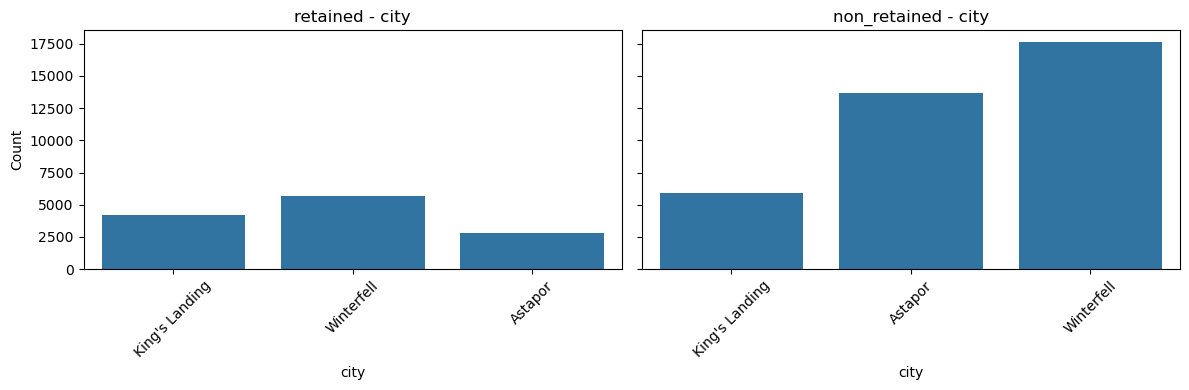

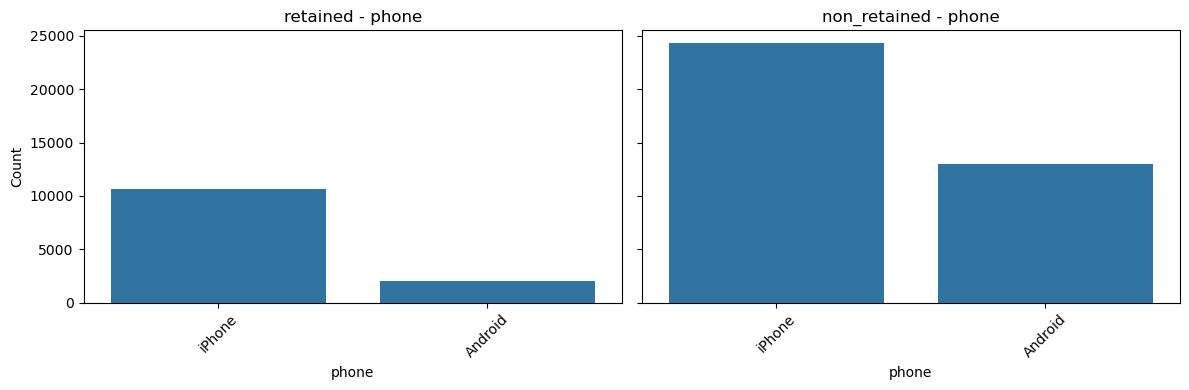

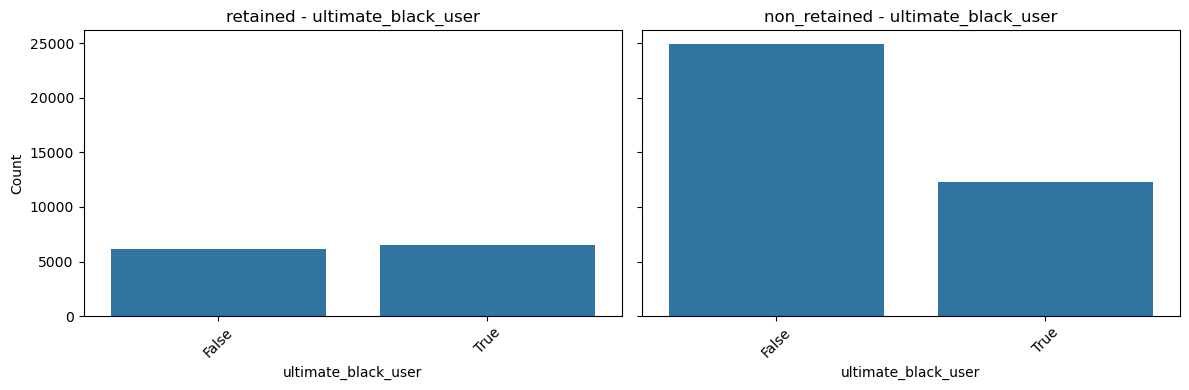

In [84]:
category_plot(df_retained, df_non_retained, categories)

**ANALYSIS:**

**CITY:**  
&nbsp;&nbsp;&nbsp;&nbsp;- **"Retained"** are more evenly distributed across cities whereas ""non-retained"** are more concentrated in Winterfell and Astapor.  
&nbsp;&nbsp;&nbsp;&nbsp;- City feature is **correlated with retention**.  

**PHONE:**  
&nbsp;&nbsp;&nbsp;&nbsp;- In **"non-retained"**, Android represents a much larger share compared to the **"retained"** group.  
&nbsp;&nbsp;&nbsp;&nbsp;- Retention is higher among iPhone users than Android users.  
&nbsp;&nbsp;&nbsp;&nbsp;- Phone feature is **correlated with retention**.  

**ULTIMATE BLACK USER:**  
&nbsp;&nbsp;&nbsp;&nbsp;- **"Retained"** are evely split between those who took an Ultimate Black User nd those who did not.  
&nbsp;&nbsp;&nbsp;&nbsp;- However, **"non-retained"** are skewed toward those who did not take an Ultimate Black User.  
&nbsp;&nbsp;&nbsp;&nbsp;- Premium exposure might increase loyalty.  
&nbsp;&nbsp;&nbsp;&nbsp;- Ultimate black user feature is **correlated with retention**.

### 3.2.2. Continuous numerical features:

In [88]:
numerical = ['trips_in_first_30_days', 
             'avg_rating_of_driver', 
             'avg_surge', 
             'surge_pct', 
             'weekday_pct', 
             'avg_dist', 
             'avg_rating_by_driver']

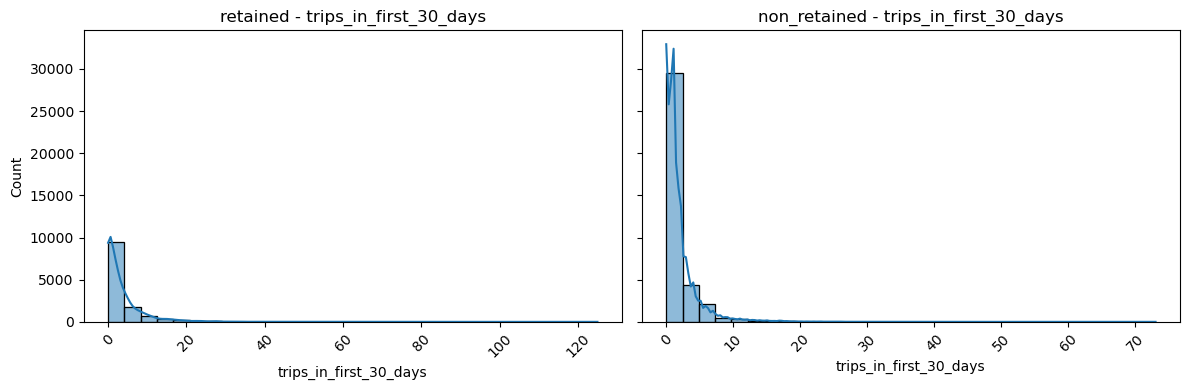

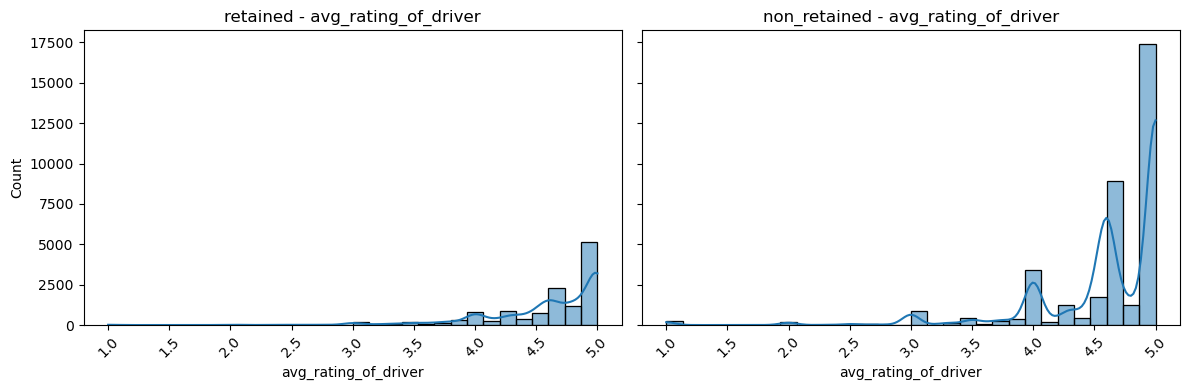

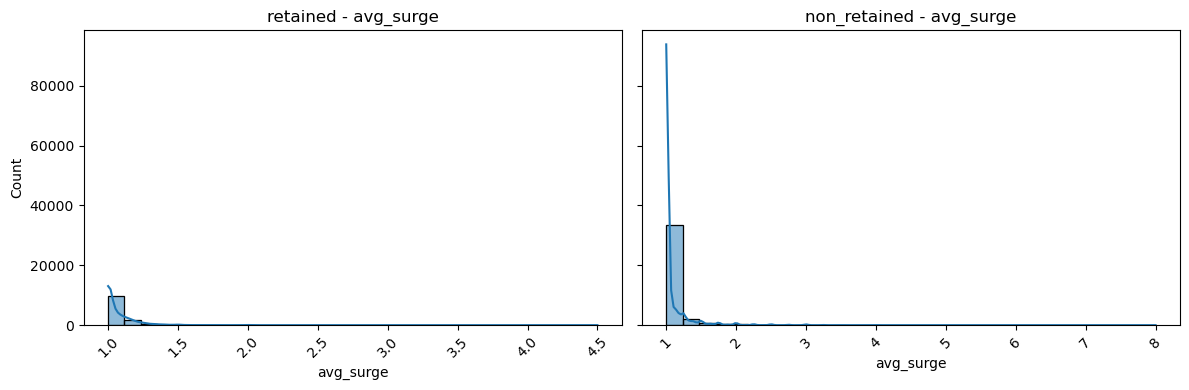

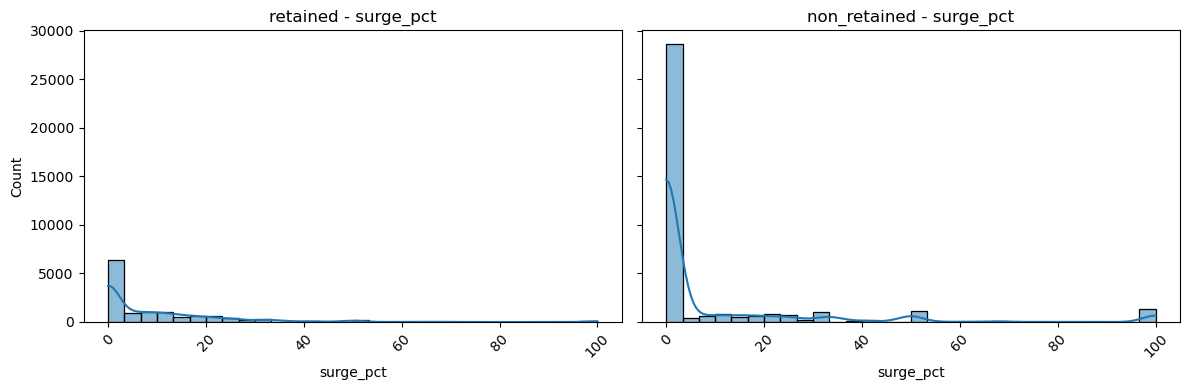

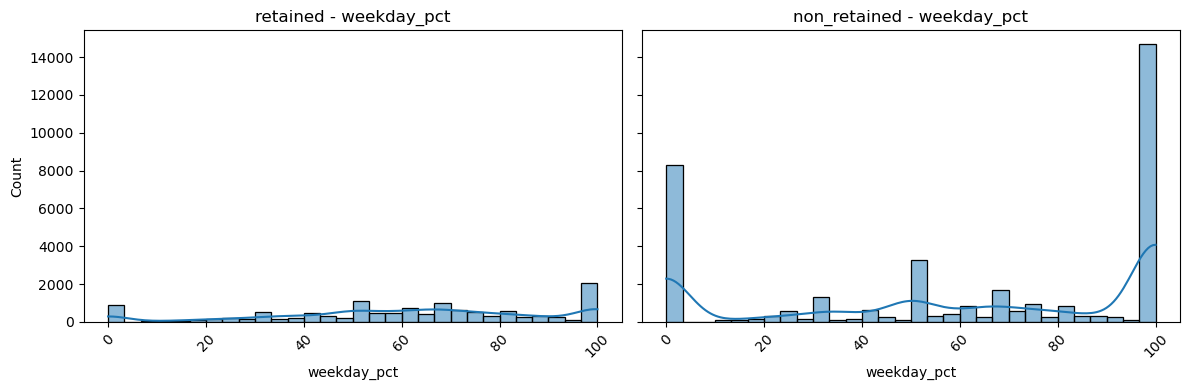

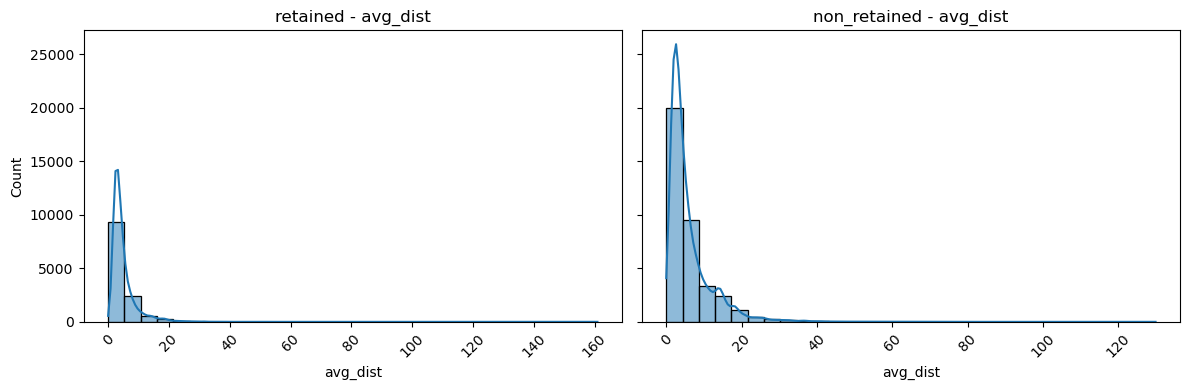

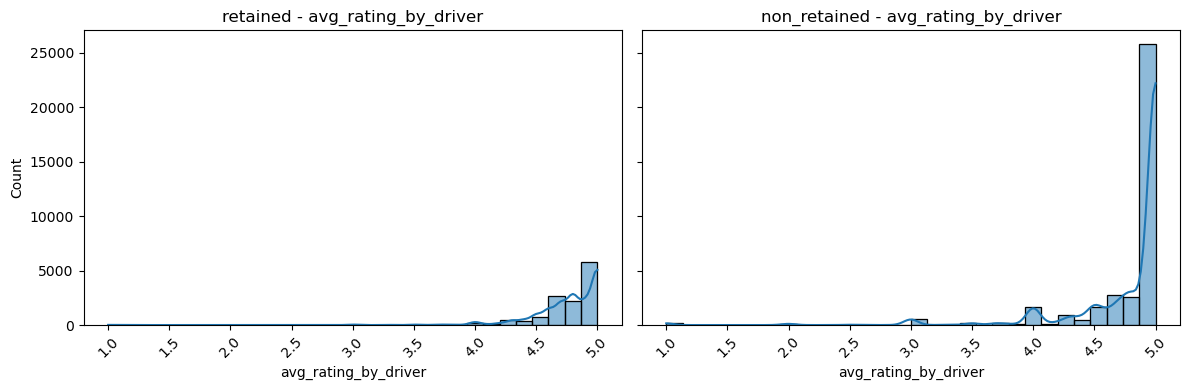

In [89]:
histogram_plot(df_retained, df_non_retained, numerical)

**ANALYSIS:**

**TRIPS IN THE FIRST 30 DAYS:**  
&nbsp;&nbsp;&nbsp;&nbsp;- **"Retained"** are more evenly distributed across cities whereas ""non-retained"** are more concentrated in Winterfell and Astapor.  
&nbsp;&nbsp;&nbsp;&nbsp;- City feature is **correlated with retention**.  

**AVERAGE RATING OF DRIVER:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Both groups are clustered around 5.0.  
&nbsp;&nbsp;&nbsp;&nbsp;- **"Retained"** with a broader spread of rating.  
&nbsp;&nbsp;&nbsp;&nbsp;- Average rating of driver feature is ** weakly correlated with retention**.  

**AVERAGE SURGE:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Both groups peak strongly at 1.0 (no surge).  
&nbsp;&nbsp;&nbsp;&nbsp;- However, **"non-retained"** might have been more exposed to surge pricing.  
&nbsp;&nbsp;&nbsp;&nbsp;- Average surge feature is **correlated with retention**.  

**SURGE PERCENTAGE:**  
&nbsp;&nbsp;&nbsp;&nbsp;- **"Non-retained"** are heavily concentrated near 0%.  
&nbsp;&nbsp;&nbsp;&nbsp;- Accepting surge pricing may be a marker of retention.  
&nbsp;&nbsp;&nbsp;&nbsp;- Surge percentage is **correlated with retention**.  

**WEEK DAY PERCENTAGE:**  
&nbsp;&nbsp;&nbsp;&nbsp;- **"Non-retained"** are skewed towards extremes (0% or 100%).  
&nbsp;&nbsp;&nbsp;&nbsp;- More balanced weekday usage is linked to higher retention.  
&nbsp;&nbsp;&nbsp;&nbsp;- Week day is **correlated with retention**.  

**AVERAGE DISTANCE:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Most trips are short.  
&nbsp;&nbsp;&nbsp;&nbsp;- However, **"retained"** seem to have slightly longer average distances than **"non-retained"**.  
&nbsp;&nbsp;&nbsp;&nbsp;- Average distance feature is **correlated with retention**. 

**AVERAGE RATING BY DRIVER:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Both groups are clustered around 5.0.  
&nbsp;&nbsp;&nbsp;&nbsp;- However, **"retained"** are very slightly less skewed than **"non-users"**..  
&nbsp;&nbsp;&nbsp;&nbsp;- Average rating by driver is **weakly correlated with retention**.  



**STRONG DISCRIMINATORS:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Trips in the first 30 days.  
&nbsp;&nbsp;&nbsp;&nbsp;- Week day percentage.  
&nbsp;&nbsp;&nbsp;&nbsp;- Average distance.  

**MODERATE DISCRIMINATORS:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Average surge.  
&nbsp;&nbsp;&nbsp;&nbsp;- Percentage surge.  

**WEAK DISCRIMINATORS:**  
&nbsp;&nbsp;&nbsp;&nbsp;- Average rating of driver.  
&nbsp;&nbsp;&nbsp;&nbsp;- Average rating by driver.  

## 3.3. Data preprocessing:

**Correlation** will check if there is any **multicolinearity** among the features whereas **"ANOVA"** will check the significance of each feature in regard to the target label.  
However, both **correlation** and **"ANOVA"** need **numerical features**.  
Therefore, the categorical features must first be converted to numerical features using **one-hot encoding**.  
Datetime features will alos be dropped.  

### 3.3.1. Features conversion:  

In [95]:
df3_encoded = pd.get_dummies(df3, columns=categories, drop_first=True, dtype=int)
df3_encoded.drop(["signup_date", "last_trip_date"], axis=1, inplace=True)

In [96]:
df3_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,0,0


### 3.3.2. Correlation & multicolinearity:

In [98]:
df_y = df3_encoded["retained"]

In [99]:
df3_corr = df3_encoded.drop("retained", axis=1)

In [100]:
corr_matrix = df3_corr.corr()
# print(corr_matrix)

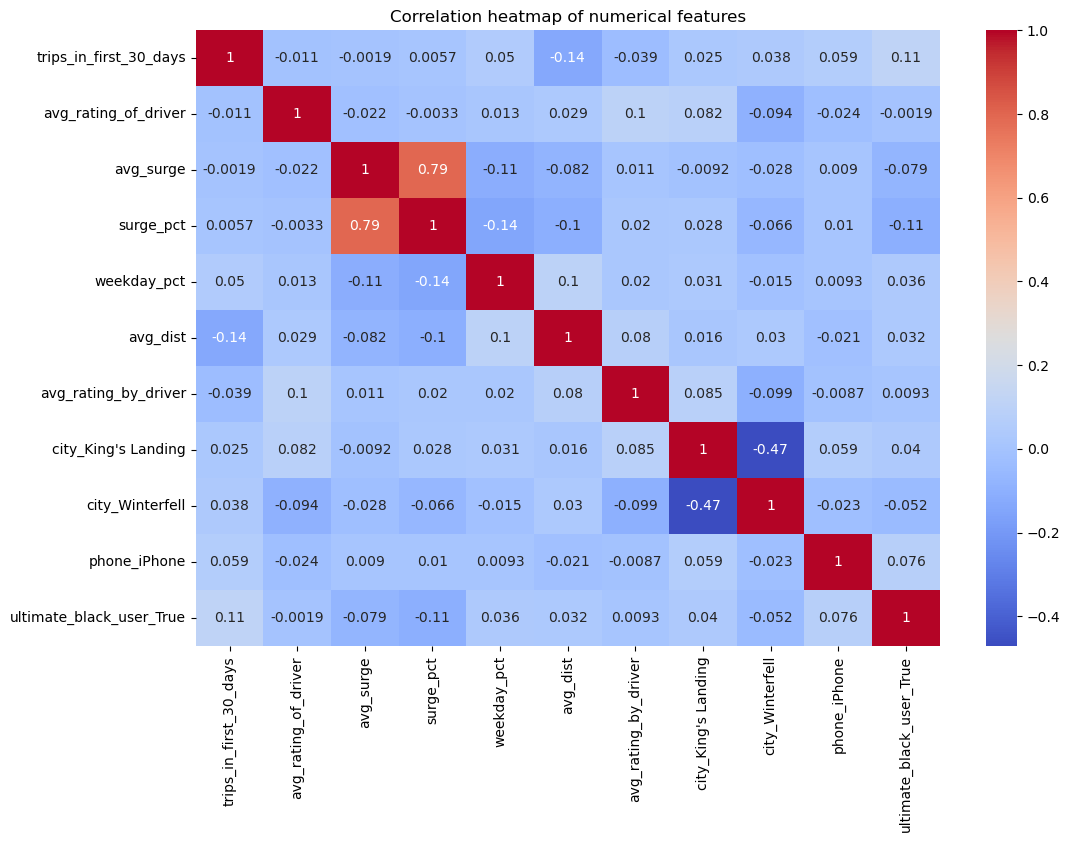

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap of numerical features")
plt.show()

**ANALYSIS:**

Correalation threshold = **80%**.  
**"avg_surge"** and **"surge_pct"** have a strong correlation and close to the threshold.  
Therefore, one of thosee feature must be **dropped**.  

In [104]:
df3_encoded.drop("avg_surge", axis=1, inplace=True)
# df3_encoded.head()

### 3.3.3. ANOVA:  

In [106]:
features_all = list(df3_encoded.columns)
features_all.remove("retained")
features_all

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 "city_King's Landing",
 'city_Winterfell',
 'phone_iPhone',
 'ultimate_black_user_True']

In [107]:
anova_results = {}

for f in features_all:
    r1 = df3_encoded.loc[df3_encoded["retained"] == 0, f]
    r2 = df3_encoded.loc[df3_encoded["retained"] == 1, f]
    f_stat, p_val = f_oneway(r1, r2)
    anova_results[f] = p_val

In [108]:
significant_features= []

for k, v in anova_results.items():
    if v <= 0.05:
        print(f"{k}: p-value ={v:.4f}.")
        significant_features.append(k)

trips_in_first_30_days: p-value =0.0000.
surge_pct: p-value =0.0001.
avg_dist: p-value =0.0000.
avg_rating_by_driver: p-value =0.0000.
city_King's Landing: p-value =0.0000.
city_Winterfell: p-value =0.0000.
phone_iPhone: p-value =0.0000.
ultimate_black_user_True: p-value =0.0000.


In [109]:
for s in significant_features:
    print(f"'{s}' is a significant feature.")

'trips_in_first_30_days' is a significant feature.
'surge_pct' is a significant feature.
'avg_dist' is a significant feature.
'avg_rating_by_driver' is a significant feature.
'city_King's Landing' is a significant feature.
'city_Winterfell' is a significant feature.
'phone_iPhone' is a significant feature.
'ultimate_black_user_True' is a significant feature.


### 3.3.4. Datasets save:

In [111]:
df_X = df3_encoded[significant_features]
df_X.head()

,trips_in_first_30_days,surge_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,15.4,3.67,5.0,1,0,1,1
1,0,0.0,8.26,5.0,0,0,0,0
2,3,0.0,0.77,5.0,0,0,1,0
3,9,20.0,2.36,4.9,1,0,1,1
4,14,11.8,3.13,4.9,0,1,0,0


In [112]:
df_X.shape

(49992, 8)

In [113]:
df_y.head()

0    0
1    0
2    0
3    1
4    0
Name: retained, dtype: int32

In [114]:
df_y.shape

(49992,)

## 3.4. Modeling:

### 3.4.1. Target balance:

In [117]:
df_y.value_counts()

retained
0    37291
1    12701
Name: count, dtype: int64

In [118]:
df_y.value_counts()[0]

37291

In [119]:
non_retained_pct = round((df_y.value_counts()[0] / df_y.shape[0]) * 100, 2)
retained_pct = round((df_y.value_counts()[1] / df_y.shape[0]) * 100, 2)

In [120]:
print(f"The target presents an important imbalance with {non_retained_pct}% representing the 'non-retained' category and {retained_pct}% representing the 'retained' category.")

The target presents an important imbalance with 74.59% representing the 'non-retained' category and 25.41% representing the 'retained' category.


**IMPORTANT NOTE:**

There is a substantial target **imbalance**.  
Therefore, **"stratify"** will be used in the split, **SMOTE** will be used for oversampling and **"class_weight"** will be used in the modeling.  

### 3.4.2. Data split:

In [123]:
X = df_X
y = df_y

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
) 

In [125]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", y_res.value_counts())

Before: retained
0    29832
1    10161
Name: count, dtype: int64
After: retained
0    29832
1    29832
Name: count, dtype: int64


### 3.4.3. Bayesian optimization:

In [127]:
CRITERIONS     = ["gini", "entropy"]
MAX_FEATURES   = ["sqrt", "log2"]
BOOTSTRAP      = [True, False]
CLASS_WEIGHT   = [None, "balanced", "balanced_subsample"]

**STEP 1 - FUNCTION:**

In [129]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def rf_optimization(
    n_estimators, max_depth, min_samples_split, min_samples_leaf,
    criterion_val, max_features_val, bootstrap_val, class_weight_val  # <— added
):
    """
    Trains a RandomForest with given hyperparameters and returns mean F1-macro via CV.
    """
    rf_model = RandomForestClassifier(
        n_estimators      = int(n_estimators),
        max_depth         = int(max_depth),
        min_samples_split = int(min_samples_split),
        min_samples_leaf  = int(min_samples_leaf),
        bootstrap         = BOOTSTRAP[int(round(bootstrap_val))],
        criterion         = CRITERIONS[int(round(criterion_val))],
        max_features      = MAX_FEATURES[int(round(max_features_val))],
        class_weight      = CLASS_WEIGHT[int(round(class_weight_val))],  # <— added
        random_state      = 42,
        n_jobs            = -1,
    )

    scores = cross_val_score(
        estimator = rf_model,
        X = X_res,
        y = y_res,
        scoring = "f1_macro",
        cv = cv,
        n_jobs = -1,
    )
    return scores.mean()

**STEP 2 - OPTIMIZER:**

In [131]:
bounds_tree = {
    "n_estimators":      (100, 700),
    "max_depth":         (10, 200),
    "min_samples_split": (2, 20),
    "min_samples_leaf":  (1, 10),
    "bootstrap_val":     (0, 1),   
    "criterion_val":     (0, 1),   
    "max_features_val":  (0, 1),   
    "class_weight_val":  (0, 2),   
}

optimizer_tree = BayesianOptimization(
    f=rf_optimization,
    pbounds=bounds_tree,
    random_state=42,
    verbose=2
) 

In [132]:
optimizer_tree.maximize(init_points=5, n_iter=15)

|   iter    |  target   | bootst... | class_... | criter... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.7947    | 0.3745    | 1.901     | 0.732     | 123.7     | 0.156     | 2.404     | 3.046     | 619.7     |
| 2         | 0.7941    | 0.6011    | 1.416     | 0.02058   | 194.3     | 0.8324    | 2.911     | 5.273     | 210.0     |
| 3         | 0.7972    | 0.3042    | 1.05      | 0.4319    | 65.33     | 0.6119    | 2.255     | 7.259     | 319.8     |
| 4         | 0.7962    | 0.4561    | 1.57      | 0.1997    | 107.7     | 0.5924    | 1.418     | 12.94     | 202.3     |
| 5         | 0.7932    | 0.06505   | 1.898     | 0.9656    | 163.6     | 0.3046    | 1.879     | 14.32     | 364.1     |
| 6         | 0.7959    | 0.1527    | 1.661     | 0.3554    | 63.5      | 0.8409    | 1.451     | 9.139     | 322.0     |
| 7         | 0.7882    

**STEP 3 - BEST PARAMETERS:**

In [134]:
best_params_tree = optimizer_tree.max["params"]
print(best_params_tree)

{'bootstrap_val': 0.13512056713992138, 'class_weight_val': 0.05620843860656999, 'criterion_val': 0.48132793597513523, 'max_depth': 147.6431336729264, 'max_features_val': 0.903061564887538, 'min_samples_leaf': 2.350843250477316, 'min_samples_split': 16.893433653077032, 'n_estimators': 496.2360434982364}


### 3.4.4. Modeling:

In [136]:
bootstrap    = BOOTSTRAP[int(round(best_params_tree["bootstrap_val"]))]
criterion    = CRITERIONS[int(round(best_params_tree["criterion_val"]))]
max_features = MAX_FEATURES[int(round(best_params_tree["max_features_val"]))]
class_weight = CLASS_WEIGHT[int(round(best_params_tree["class_weight_val"]))]

In [137]:
best_rf_model = RandomForestClassifier(
    n_estimators      = int(round(best_params_tree["n_estimators"])),
    max_depth         = int(round(best_params_tree["max_depth"])),
    min_samples_split = int(round(best_params_tree["min_samples_split"])),
    min_samples_leaf  = int(round(best_params_tree["min_samples_leaf"])),
    bootstrap         = bootstrap,
    criterion         = criterion,
    max_features      = max_features,
    class_weight      = class_weight,
    random_state      = 42,
    n_jobs            = -1
)

In [138]:
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)

### 3.4.5. Performance metrics:

**METRICS:**

random forest, bayesian optimization, F1 score: 0.6806122765135426.
random forest, bayesian optimization, Precision score: 0.707315690402347.
random forest, bayesian optimization, Recall score: 0.6669554720661928.

random forest, bayesian optimization, Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      7459
           1       0.59      0.44      0.50      2540

    accuracy                           0.78      9999
   macro avg       0.71      0.67      0.68      9999
weighted avg       0.76      0.78      0.77      9999
.



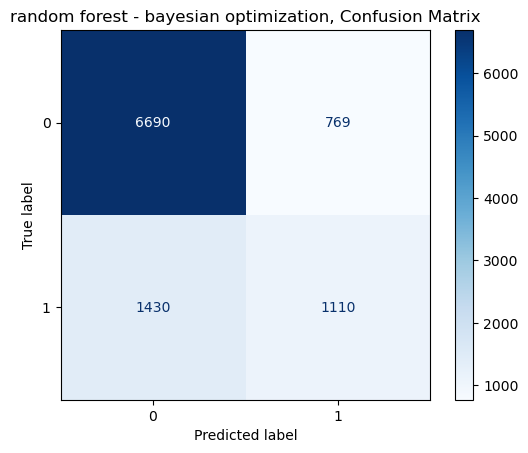

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7459
           1       0.59      0.44      0.50      2540

    accuracy                           0.78      9999
   macro avg       0.71      0.67      0.68      9999
weighted avg       0.76      0.78      0.77      9999



In [141]:
rf_bopt_metrics = model_performance_metrics("random forest", "bayesian optimization", y_test, y_pred_rf)
print(rf_bopt_metrics)

**CONCLUSION:**

The model performs well on the initial majority class (**"non-retained"**) but struggles on the minority class (**"retained"**), with **recall only 44%** despite using **SMOTE**.  
This shows that **SMOTE** alone was **not enough** to fully counter the imbalance and the model **still misses many retained users**.   
**F1 score = 78%**

## 3.5. Recommendations:

The features below have a strong impact on the retention:

- **Trips in the first 30 days**: early engagement is the strongest predictor of long-term retention.  
- **Surge percentage**: high surge percentage, more likely retained.  
- **Average distance**: longer average distance, more likely retained.  
- **Average rating by the driver**: positive rider behaviour, more likely retained. 
- **Kings Landing city origin**: more likely retained. 
- **Winterfell city orign**: less likely retained.  
- **iPhone**: more likely retained.  
- **Ultimate black user**: premium exposure, more likely retained. 

**To improve the metrics performance:**  

- Try other models like XGBoost.  
- Use SMOTE with cleaning methods.  
- More features engineering to capture more predictive patterns.  